# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



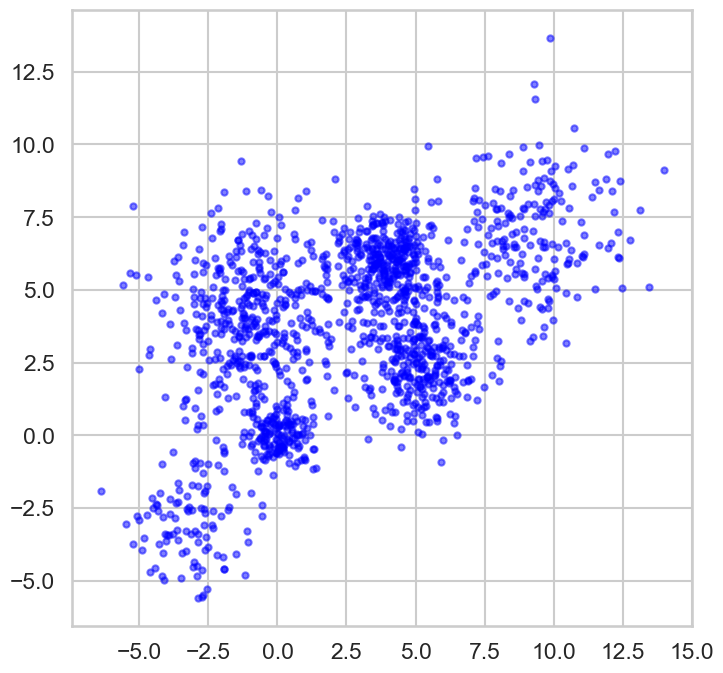

In [3]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

In [393]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Multi_blob_Data)

In [394]:
def kmeans_analysis(X, true_labels, k_range=(2,10)):
    distortions = []
    silhouette_scores = []
    best_score = -1
    best_k = 0
    
    plt.figure(figsize=(15, 10))
    
    for i, k in enumerate(range(k_range[0], k_range[1]+1)):
        # K-means with k-means++ initialization
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = kmeans.fit_predict(X)
        
        # Metrics
        distortion = kmeans.inertia_
        silhouette = silhouette_score(X, labels)
        
        distortions.append(distortion)
        silhouette_scores.append(silhouette)
        
        # Visualize clusters
        plt.subplot(3, 3, i+1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)
        plt.title(f'K={k}\nSilhouette: {silhouette:.2f}')
        plt.xticks([])
        plt.yticks([])
        
        if silhouette > best_score:
            best_score = silhouette
            best_k = k
    
    # Plot metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow Method
    ax1.plot(range(k_range[0], k_range[1]+1), distortions, 'bx-')
    ax1.set_xlabel('Number of clusters (K)')
    ax1.set_ylabel('Distortion')
    ax1.set_title('Elbow Method')
    
    # Silhouette Analysis
    ax2.plot(range(k_range[0], k_range[1]+1), silhouette_scores, 'rx-')
    ax2.set_xlabel('Number of clusters (K)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    
    print(f"Best K: {best_k} with Silhouette Score: {best_score:.3f}")
    
    return best_score

Best K: 6 with Silhouette Score: 0.486


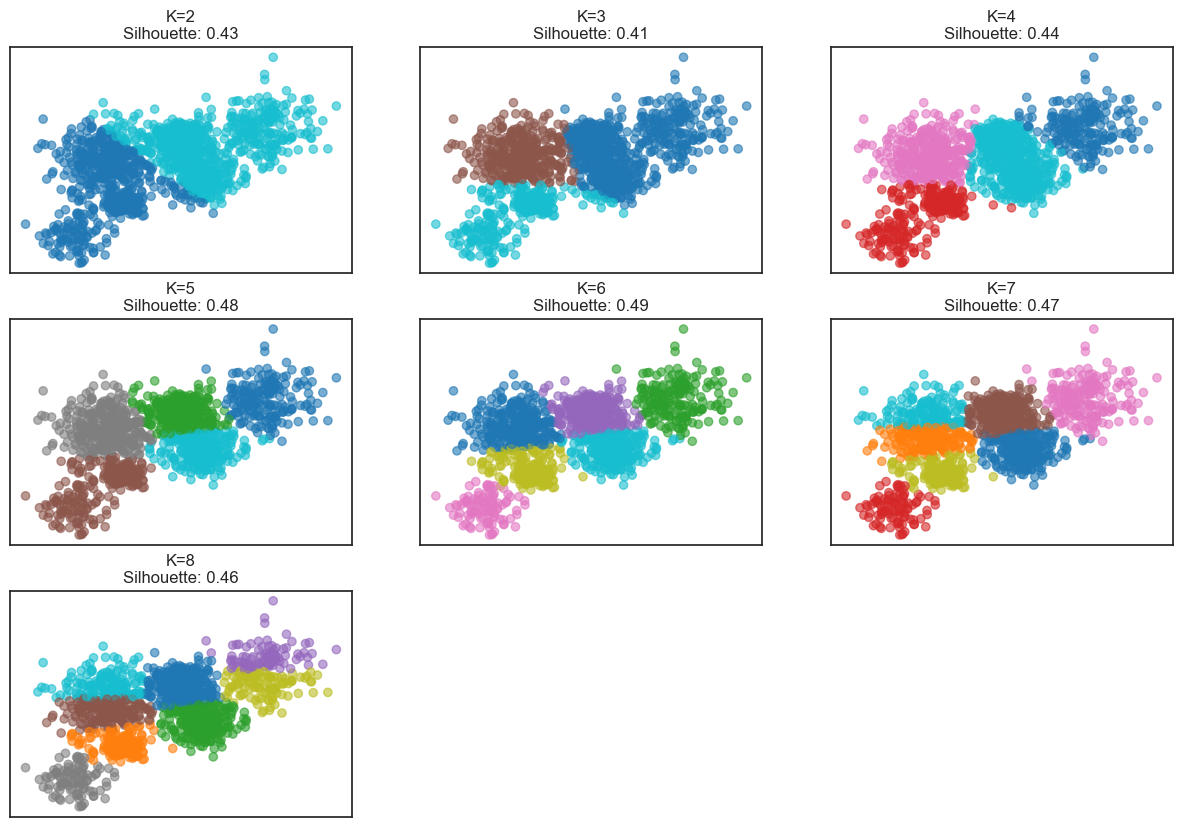

In [395]:
best_silhouette_multiBlob = kmeans_analysis(scaled_data, y, k_range=(2,8))

In [397]:
best_silhouette_multiBlob

np.float64(0.4862522276594507)

#### Effect of Centroid Initialization on Cluster Assignment

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def compare_initialization(X_scaled, true_labels, n_trials=10):
    # Storage for metrics
    aris_random = []
    aris_plus = []
    iterations_random = []
    iterations_plus = []
    
    for _ in range(n_trials):
        # Random initialization
        kmeans_random = KMeans(n_clusters=6, init='random', n_init=1, random_state=None)
        kmeans_random.fit(X_scaled)
        aris_random.append(adjusted_rand_score(true_labels, kmeans_random.labels_))
        iterations_random.append(kmeans_random.n_iter_)
        
        # k-means++ initialization
        kmeans_plus = KMeans(n_clusters=6, init='k-means++', n_init=1, random_state=None)
        kmeans_plus.fit(X_scaled)
        aris_plus.append(adjusted_rand_score(true_labels, kmeans_plus.labels_))
        iterations_plus.append(kmeans_plus.n_iter_)
    
    # Print results
    print(f"Random Initialization (ARI): Mean = {np.mean(aris_random):.3f}, Std = {np.std(aris_random):.3f}")
    print(f"k-means++ Initialization (ARI): Mean = {np.mean(aris_plus):.3f}, Std = {np.std(aris_plus):.3f}")
    print(f"\nRandom Initialization Iterations: Mean = {np.mean(iterations_random):.1f}")
    print(f"k-means++ Iterations: Mean = {np.mean(iterations_plus):.1f}")

# Execute comparison
compare_initialization(scaled_data, y)

Random Initialization (ARI): Mean = 0.730, Std = 0.021
k-means++ Initialization (ARI): Mean = 0.733, Std = 0.021

Random Initialization Iterations: Mean = 14.5
k-means++ Iterations: Mean = 9.9


### Observations on Centroid Initialization

- **Clustering Quality:**  
  - Both Random and k-means++ initializations deliver similar clustering quality (ARI ≈ 0.730–0.733 with a standard deviation of 0.021).

- **Convergence Efficiency:**  
  - k-means++ converges faster, requiring an average of 9.9 iterations compared to 14.5 iterations for Random Initialization.

- **Conclusion:**  
  - While the ARI differences are minimal, the faster convergence of k-means++ makes it a more efficient choice.


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.exceptions import NotFittedError

In [174]:
Multi_blob_std = StandardScaler().fit_transform(Multi_blob_Data) 


Testing: Linkage=ward, Affinity=euclidean, Threshold=5
Silhouette Score: 0.33
Testing: Linkage=ward, Affinity=euclidean, Threshold=10
Silhouette Score: 0.45
Testing: Linkage=ward, Affinity=euclidean, Threshold=14
Silhouette Score: 0.47
Testing: Linkage=complete, Affinity=euclidean, Threshold=5
Silhouette Score: 0.37
Testing: Linkage=complete, Affinity=euclidean, Threshold=10
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=complete, Affinity=euclidean, Threshold=14
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=average, Affinity=euclidean, Threshold=5
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=average, Affinity=euclidean, Threshold=10
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=average, Affinity=euclidean, Threshold=14
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=single, Affinity=euclidean, Threshold=5
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=

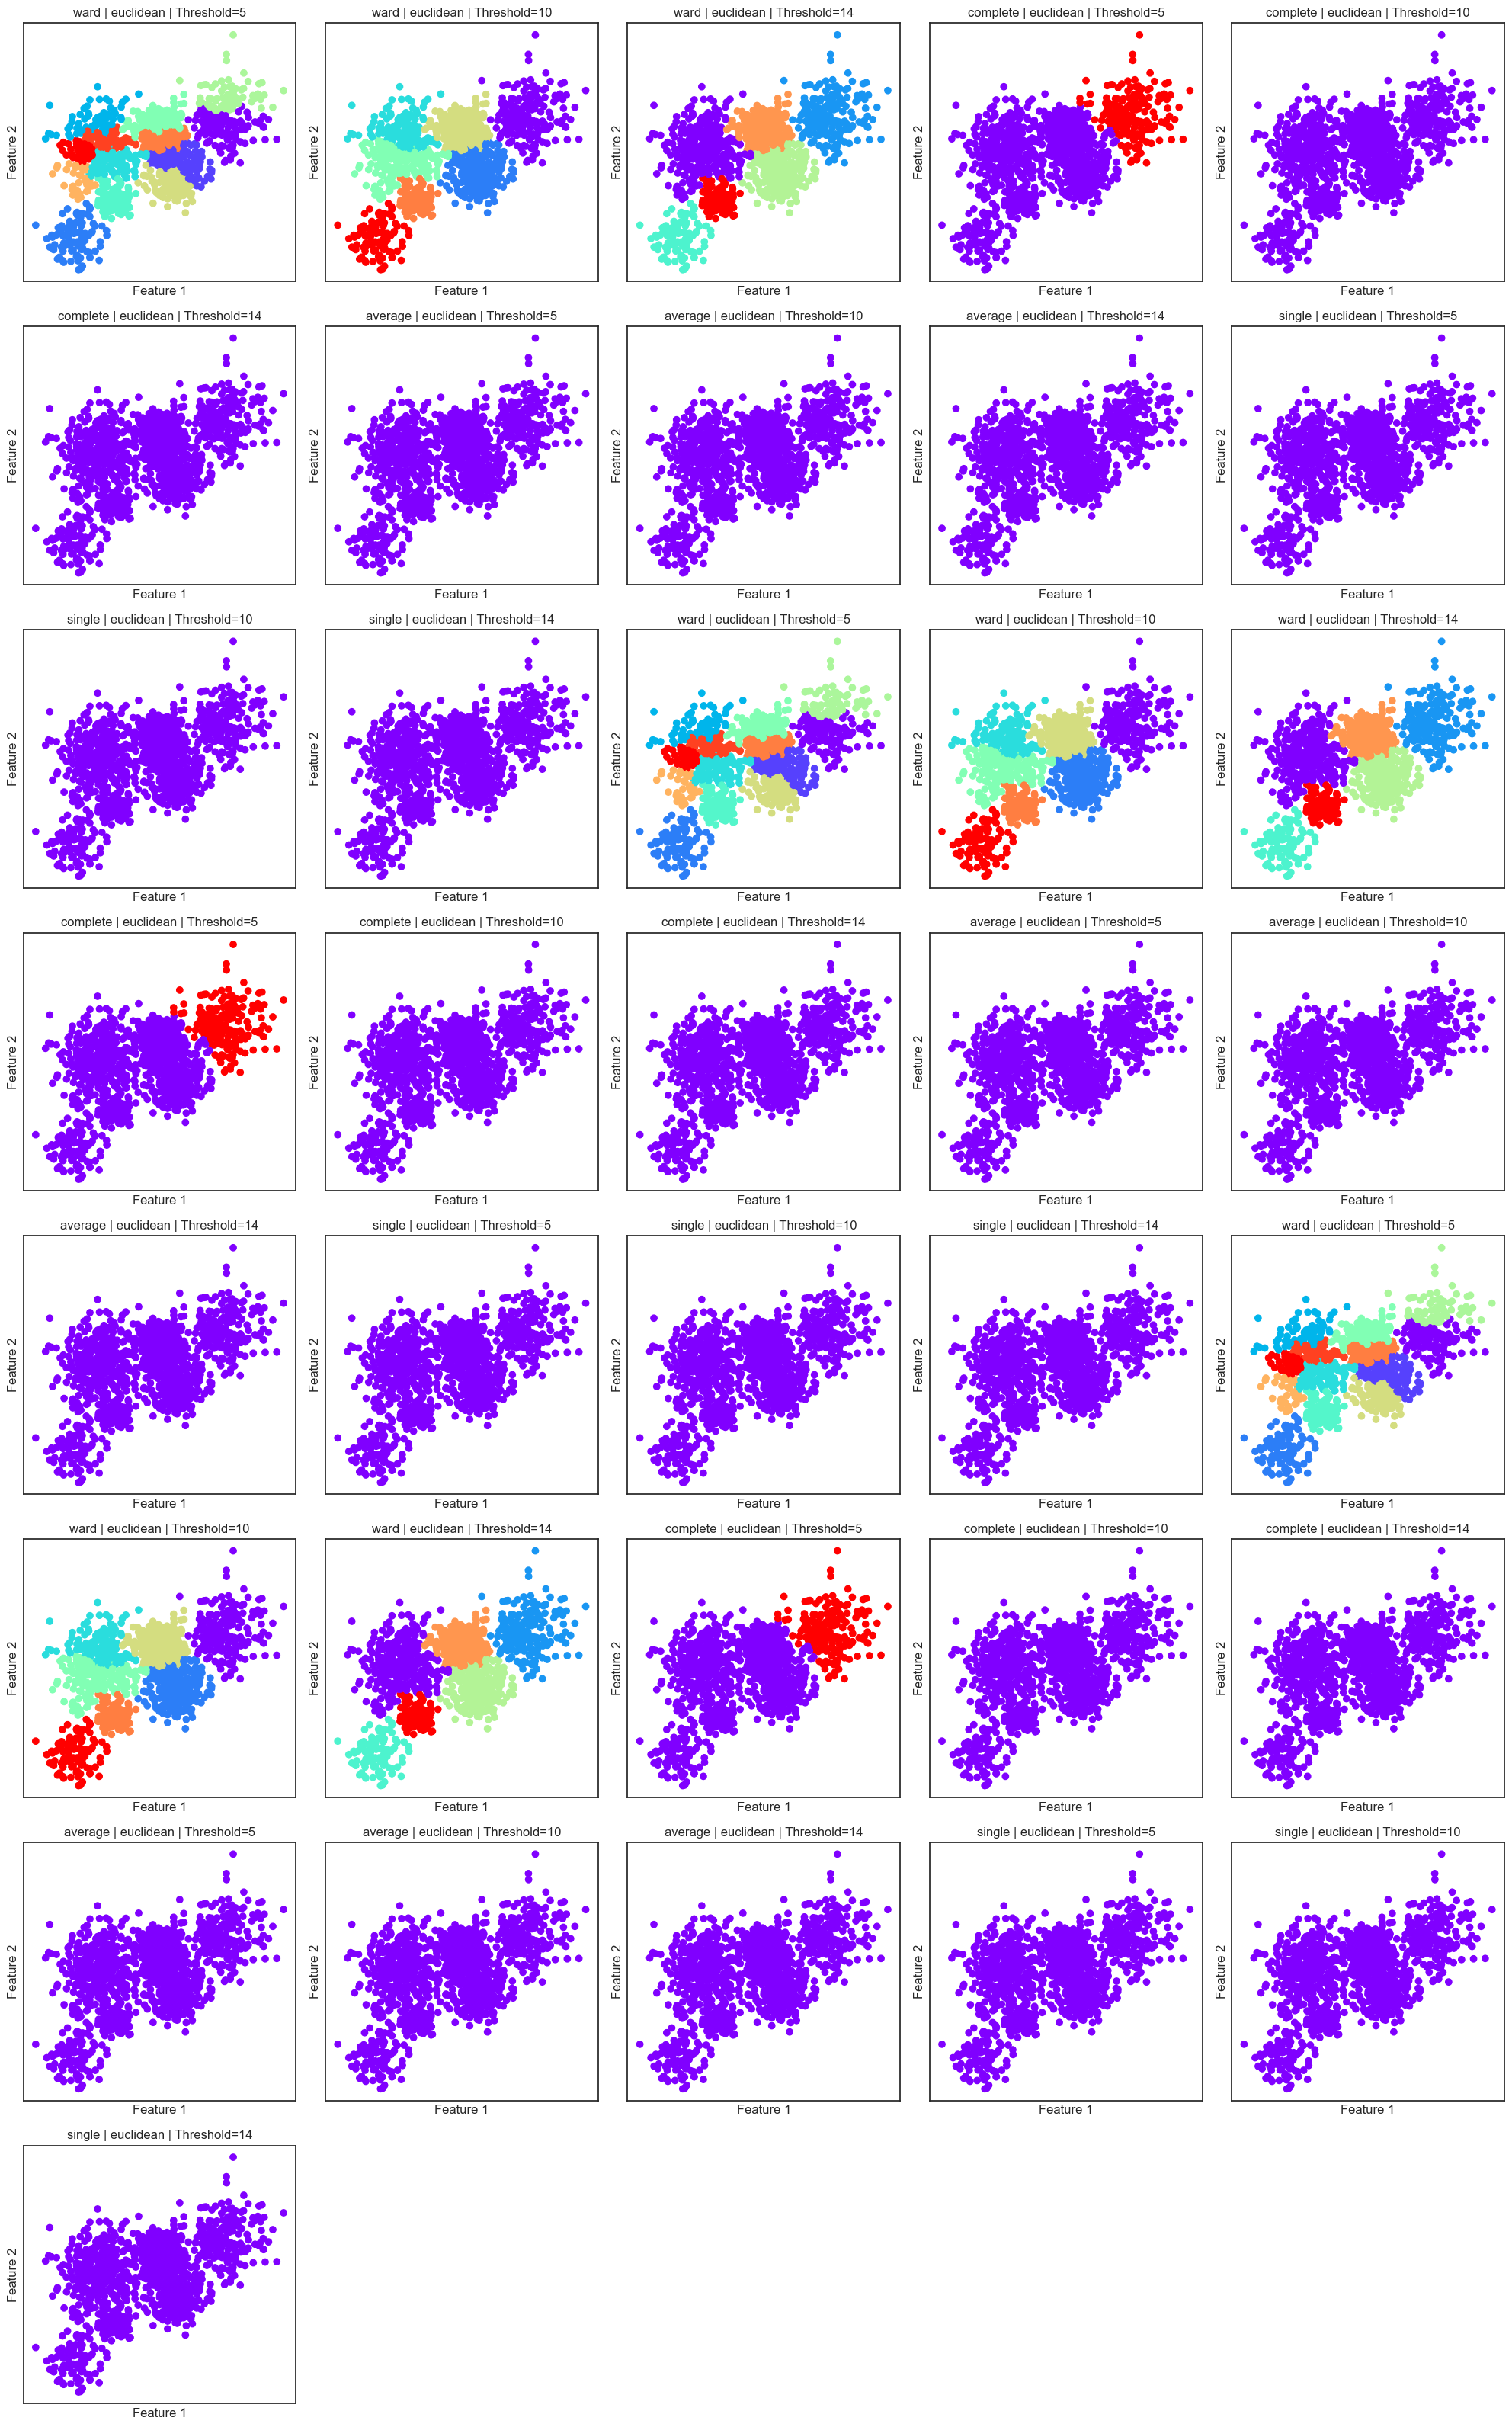


Best Silhouette Score: 0.47
Best Parameters: {'linkage': 'ward', 'affinity': 'euclidean', 'threshold': 14}


In [452]:
# Define the parameter options
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']
thresholds = [5, 10, 14]  # Adjust the thresholds as needed

# Function to plot clusters
def plot_clusters(X, model, linkage_method, affinity_metric, threshold, subplot_index, total_plots):
    """
    Plot the clustering results as subplots.
    
    Parameters:
    - X : ndarray
        Input data for clustering.
    - model : AgglomerativeClustering object
        The fitted clustering model.
    - linkage_method : str
        Linkage method used.
    - affinity_metric : str
        Affinity used for distance calculation.
    - threshold : float
        Distance threshold for clustering.
    - subplot_index : int
        Index of the subplot where the plot will be displayed.
    - total_plots : int
        Total number of subplots to adjust layout accordingly.
    """
    plt.subplot(n_rows, n_cols, subplot_index)
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='rainbow')
    plt.title(f'{linkage_method} | {affinity_metric} | Threshold={threshold}')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xticks([])  # Remove x-axis ticks for cleaner presentation
    plt.yticks([])  # Remove y-axis ticks for cleaner presentation

# Perform Agglomerative Clustering and plot for all combinations
def agglomerative_clustering_and_plot(X, affinities, linkages, thresholds):
    """
    Perform Agglomerative Clustering for each combination of parameters, 
    plot the results, and return the best combination of parameters.
    
    Parameters:
    - X : ndarray
        Input data for clustering.
    - affinities : list of str
        List of distance metrics ('euclidean', 'manhattan', 'cosine').
    - linkages : list of str
        List of linkage strategies ('ward', 'complete', 'average', 'single').
    - thresholds : list of float
        List of distance thresholds for clustering.

    Returns:
    - best_params : dict
        The best parameter combination found (linkage, affinity, threshold).
    - best_score : float
        The best silhouette score achieved.
    """
    best_score = -1
    best_params = {}

    # Calculate total number of plots needed
    total_plots = len(affinities) * len(linkages) * len(thresholds)
    
    # Organize the plots in a grid layout (adjusting rows and columns dynamically)
    global n_rows, n_cols
    n_cols = 5  # Set a maximum of 5 plots per row (you can adjust this number)
    n_rows = (total_plots // n_cols) + (total_plots % n_cols != 0)  # Calculate rows needed
    
    # Create a figure for plotting all the subplots
    plt.figure(figsize=(20, 4 * n_rows))  # Adjust figure height based on number of rows

    # Loop through all combinations
    subplot_index = 1
    for affinity in affinities:
        for linkage in linkages:
            for threshold in thresholds:
                print(f"Testing: Linkage={linkage}, Affinity={affinity}, Threshold={threshold}")
                
                try:
                    # Ensure 'ward' linkage uses only 'euclidean'
                    if linkage == 'ward' and affinity != 'euclidean':
                        print("Warning: 'ward' linkage requires 'euclidean' affinity. Changing affinity to 'euclidean'.")
                        affinity = 'euclidean'

                    # Perform Agglomerative Clustering
                    model = AgglomerativeClustering(linkage=linkage, metric=affinity, 
                                                    distance_threshold=threshold, n_clusters=None)
                    model.fit(X)

                    # Calculate silhouette score (if more than one cluster exists)
                    if len(set(model.labels_)) > 1:
                        score = silhouette_score(X, model.labels_)
                        print(f"Silhouette Score: {score:.2f}")
                    else:
                        print("Silhouette Score: Cannot calculate with one cluster")
                        score = -1  # Assign a default value if only one cluster

                    # Plot the clusters in the current subplot
                    plot_clusters(X, model, linkage, affinity, threshold, subplot_index, total_plots)
                    
                    # Check if this is the best score
                    if score > best_score:
                        best_score = score
                        best_params = {"linkage": linkage, "affinity": affinity, "threshold": threshold}

                    subplot_index += 1  # Move to the next subplot
                
                except ValueError as e:
                    print(f"Error: {e}. Skipping this combination.")
                except Exception as e:
                    print(f"Unexpected error: {e}. Skipping this combination.")

    # Adjust the layout for the subplots
    plt.tight_layout()
    plt.show()

    # Return the best parameters and score
    return best_params, best_score

# Now, call the function with Multi_blob_std and display the plots
best_params, best_score = agglomerative_clustering_and_plot(Multi_blob_std, affinities, linkages, thresholds)

# Output the best parameters and score
print(f"\nBest Silhouette Score: {best_score:.2f}")
print(f"Best Parameters: {best_params}")










In [444]:
def plot_dendrogram(Z, distance_threshold, linkage_method):
    """Plots the dendrogram with the given linkage matrix Z."""
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f"Dendrogram ({linkage_method} linkage)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.axhline(y=distance_threshold, color='r', linestyle='--', label="Threshold")  
    plt.legend()
    plt.show()

In [453]:
linkage_method = best_params['linkage']
affinity_metric = best_params['affinity']
threshold = best_params['threshold']

In [454]:
Z = linkage(Multi_blob_std, method=linkage_method, metric=affinity_metric)

plot_dendrogram(Z, threshold, linkage_method)

### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

In [1075]:
from sklearn import metrics


eps_range = np.arange(0.1, 0.3, 0.01)
min_samples_range = range(5, 26)

results = []
best_score = -1
best_params = (0, 0)

# DBSCAN Tuning
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        customer_labels = dbscan.fit_predict(Multi_blob_std)

        # Skip if only 1 cluster or all noise
        n_clusters = len(set(customer_labels)) - (1 if -1 in customer_labels else 0)
        if n_clusters <= 1:
            continue

        score = metrics.silhouette_score(Multi_blob_std, customer_labels)
        results.append((eps, min_samples, score))

        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

# Create heatmap data
heatmap_data = np.full((len(min_samples_range), len(eps_range)), np.nan)

for eps, min_samples, score in results:
    eps_idx = int(round((eps - eps_range[0]) / 0.01))
    min_samples_idx = min_samples - min(min_samples_range)
    heatmap_data[min_samples_idx, eps_idx] = score

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    xticklabels=[f"{e:.2f}" for e in eps_range],
    yticklabels=list(min_samples_range),
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Silhouette Score"}
)
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Silhouette Scores for DBSCAN Parameters")
plt.tight_layout()
plt.show()

# Final Result
print(f" Best eps: {best_params[0]:.2f}")
print(f"Best min_samples: {best_params[1]}")
print(f"Best Silhouette Score: {best_score:.4f}")


 Best eps: 0.29
Best min_samples: 16
Best Silhouette Score: 0.3028


In [1077]:
from sklearn import metrics


eps_range = np.arange(0.30, 0.61, 0.01)
min_samples_range = range(5, 26)

results = []
best_score = -1
best_params = (0, 0)

# DBSCAN Tuning
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        customer_labels = dbscan.fit_predict(Multi_blob_std)

        # Skip if only 1 cluster or all noise
        n_clusters = len(set(customer_labels)) - (1 if -1 in customer_labels else 0)
        if n_clusters <= 1:
            continue

        score = metrics.silhouette_score(Multi_blob_std, customer_labels)
        results.append((eps, min_samples, score))

        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

# Create heatmap data
heatmap_data = np.full((len(min_samples_range), len(eps_range)), np.nan)

for eps, min_samples, score in results:
    eps_idx = int(round((eps - eps_range[0]) / 0.01))
    min_samples_idx = min_samples - min(min_samples_range)
    heatmap_data[min_samples_idx, eps_idx] = score

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    xticklabels=[f"{e:.2f}" for e in eps_range],
    yticklabels=list(min_samples_range),
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Silhouette Score"}
)
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Silhouette Scores for DBSCAN Parameters")
plt.tight_layout()
plt.show()

# Final Result
print(f" Best eps: {best_params[0]:.2f}")
print(f"Best min_samples: {best_params[1]}")
print(f"Best Silhouette Score: {best_score:.4f}")

 Best eps: 0.30
Best min_samples: 18
Best Silhouette Score: 0.3038


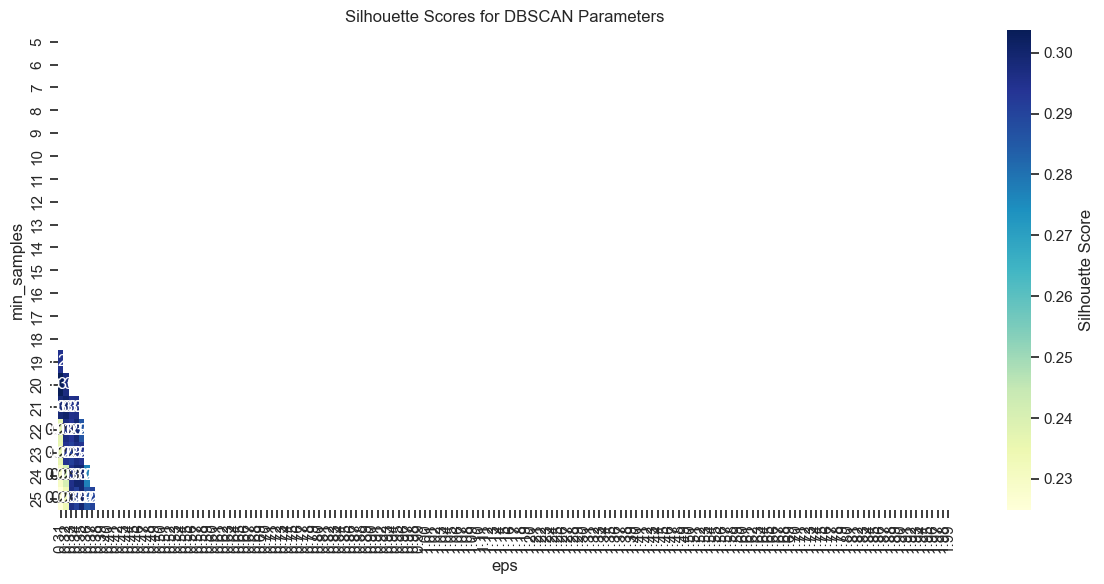

 Best eps: 0.31
Best min_samples: 20
Best Silhouette Score: 0.3037


In [1078]:
from sklearn import metrics


eps_range = np.arange(0.31, 2, 0.01)
min_samples_range = range(5, 26)

results = []
best_score = -1
best_params = (0, 0)

# DBSCAN Tuning
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        customer_labels = dbscan.fit_predict(Multi_blob_std)

        # Skip if only 1 cluster or all noise
        n_clusters = len(set(customer_labels)) - (1 if -1 in customer_labels else 0)
        if n_clusters <= 1:
            continue

        score = metrics.silhouette_score(Multi_blob_std, customer_labels)
        results.append((eps, min_samples, score))

        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

# Create heatmap data
heatmap_data = np.full((len(min_samples_range), len(eps_range)), np.nan)

for eps, min_samples, score in results:
    eps_idx = int(round((eps - eps_range[0]) / 0.01))
    min_samples_idx = min_samples - min(min_samples_range)
    heatmap_data[min_samples_idx, eps_idx] = score

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    xticklabels=[f"{e:.2f}" for e in eps_range],
    yticklabels=list(min_samples_range),
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Silhouette Score"}
)
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Silhouette Scores for DBSCAN Parameters")
plt.tight_layout()
plt.show()

# Final Result
print(f" Best eps: {best_params[0]:.2f}")
print(f"Best min_samples: {best_params[1]}")
print(f"Best Silhouette Score: {best_score:.4f}")

In [1091]:

best_eps = 0.32
best_min_samples = 28

# Apply DBSCAN with best parameters
db = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = db.fit_predict(Multi_blob_std)

# Calculate silhouette score
sil_score = silhouette_score(Multi_blob_std, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Plotting the DBSCAN results
plt.figure(figsize=(10, 6))

# Get the unique labels (including noise (-1))
unique_labels = np.unique(labels)

# Use a colormap for colors
cmap = plt.cm.get_cmap("Spectral", len(unique_labels))

for k in unique_labels:
    # Create a mask for the points in the current cluster
    class_member_mask = (labels == k)
    
    # Choose a color from the colormap
    color = cmap(k / len(unique_labels))
    
    # Plot the points
    plt.scatter(Multi_blob_std[class_member_mask, 0], Multi_blob_std[class_member_mask, 1], 
                s=30, c=[color], label=f"Cluster {k}" if k != -1 else "Noise")

plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Silhouette Score: 0.2229


Silhouette Score: 0.1559


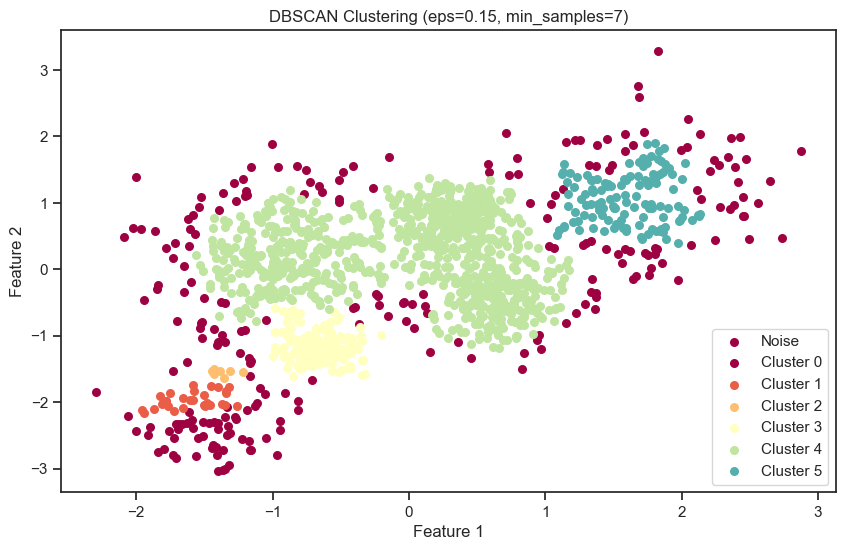

In [1092]:
#### Manually adjustment 

best_eps = 0.15
best_min_samples = 7

# Apply DBSCAN with best parameters
db = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = db.fit_predict(Multi_blob_std)

# Calculate silhouette score
sil_score = silhouette_score(Multi_blob_std, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Plotting the DBSCAN results
plt.figure(figsize=(10, 6))

# Get the unique labels (including noise (-1))
unique_labels = np.unique(labels)

# Use a colormap for colors
cmap = plt.cm.get_cmap("Spectral", len(unique_labels))

for k in unique_labels:
    # Create a mask for the points in the current cluster
    class_member_mask = (labels == k)
    
    # Choose a color from the colormap
    color = cmap(k / len(unique_labels))
    
    # Plot the points
    plt.scatter(Multi_blob_std[class_member_mask, 0], Multi_blob_std[class_member_mask, 1], 
                s=30, c=[color], label=f"Cluster {k}" if k != -1 else "Noise")

plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Clustering Model Comparison

The dataset, defined as a multiblob with 6 clusters, was analyzed using three clustering models. Below are the silhouette scores for each model:

- **KMeans (6 clusters):** Silhouette Score = 0.4862
- **Agglomerative Clustering (6 clusters):** Silhouette Score = 0.47
- **DBSCAN (default: 2 clusters):** Silhouette Score = 0.3028  
  - *Manually adjusted to 6 clusters:* Silhouette Score = 0.1559

**decision:**
- The KMeans model achieved the highest silhouette score, making it the most effective clustering method for this dataset. 
- Adjusting DBSCAN to fit 6 clusters resulted in a much lower silhouette score, indicating the method may not be suitable for this structure.

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [1297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans

In [1341]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [1342]:
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['species'] = [iris_data.target_names[label] for label in iris_data.target]
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [1344]:
df_iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [1345]:
categorical_summaries = [df_iris[c].value_counts() for c in df_iris.columns if df_iris[c].dtype == 'object']

for i in categorical_summaries:
    display(pd.DataFrame(i))

count
species          
setosa         50
versicolor     50
virginica      50

In [1366]:
def numerical_distribution (colnumber, plot_type='histogram', data=df_iris):
    """
    function for plotting histogram of the column number corresponding to the numerical variable selected
    colnumber is the column number corresponding to the numerical variable selected,
    a boxplot of the numerical variable depending on the categorical variable
    """
    
    if plot_type=='histogram':
        
        # x label for the histogram
        plt.xlabel(df_iris.columns[colnumber])
    
        # y label for the histogram (-1 points to the last column of the set)
        plt.ylabel('Frequency')
    
        # title for the histogram
        plt.title(df_iris.columns[colnumber] + ' distribution')
    
        # histogram
        df_iris.iloc[:,colnumber].plot.hist()
        
    elif plot_type=='boxplot':
    
        # setting type of plot
        sns.set(style="ticks", color_codes=True)
    
        # setting what values we plot
        sns.catplot(
            x=df_iris.columns[-1],  # Last column as x-axis (categorical variable)
            y=df_iris.columns[colnumber],  # Column based on colnumber as y-axis
            kind='box', 
            data=df_iris  # Correct parameter name for DataFrame
        );    
        # title
        plt.title(df_iris.columns[colnumber] + ' distribution depending on ' + df_iris.columns[-1])

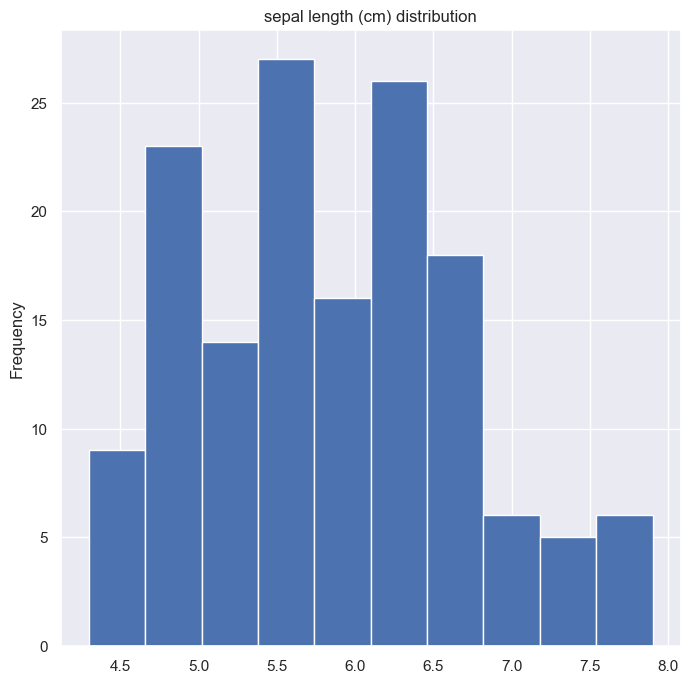

In [1348]:
numerical_distribution(0,'histogram')
## sepal_length has a normal distribution.

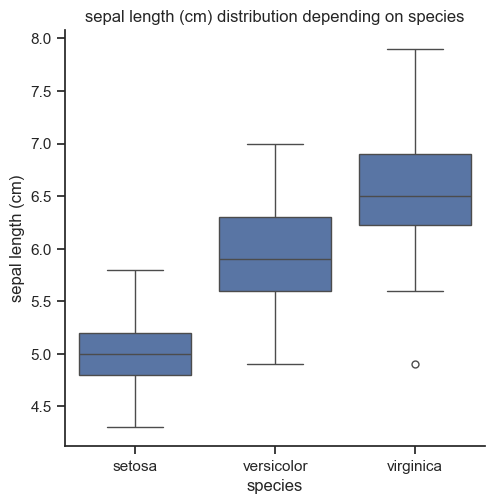

In [1367]:
numerical_distribution(0,'boxplot')

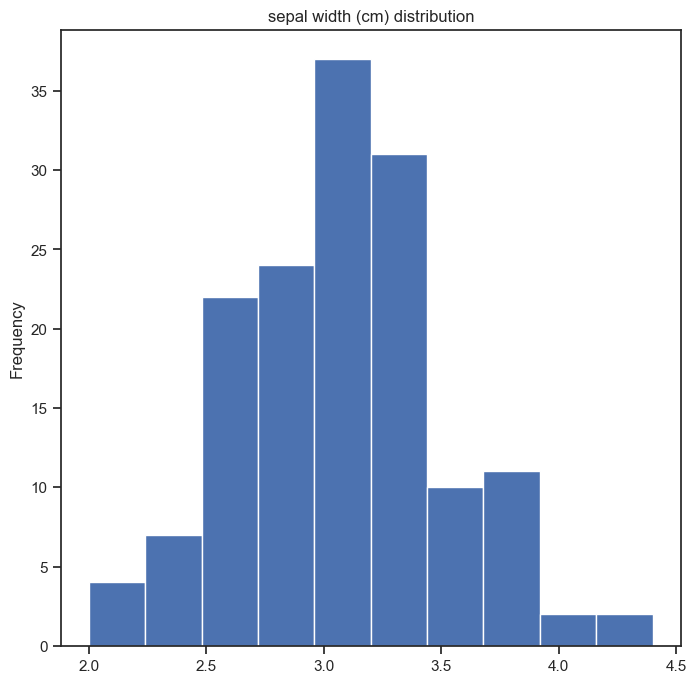

In [1350]:
numerical_distribution(1,'histogram')


In [1351]:
numerical_distribution(1,'boxplot')


In [1352]:
numerical_distribution(2,'histogram')


In [1353]:
numerical_distribution(2,'boxplot')


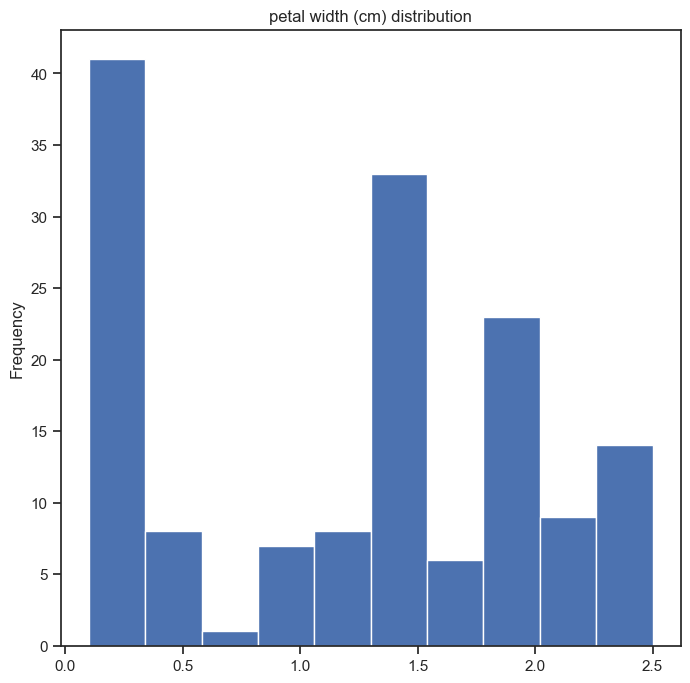

In [1354]:
numerical_distribution(3,'histogram')


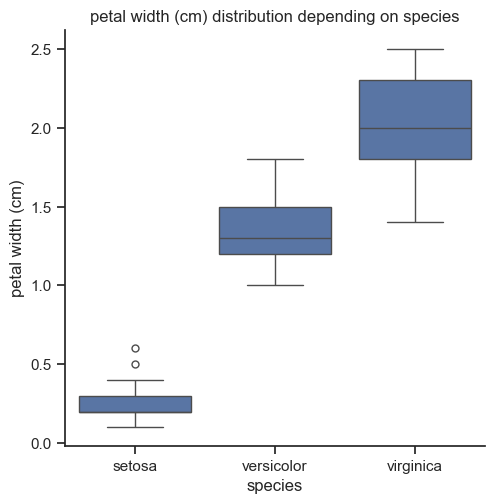

In [1355]:
numerical_distribution(3,'boxplot')


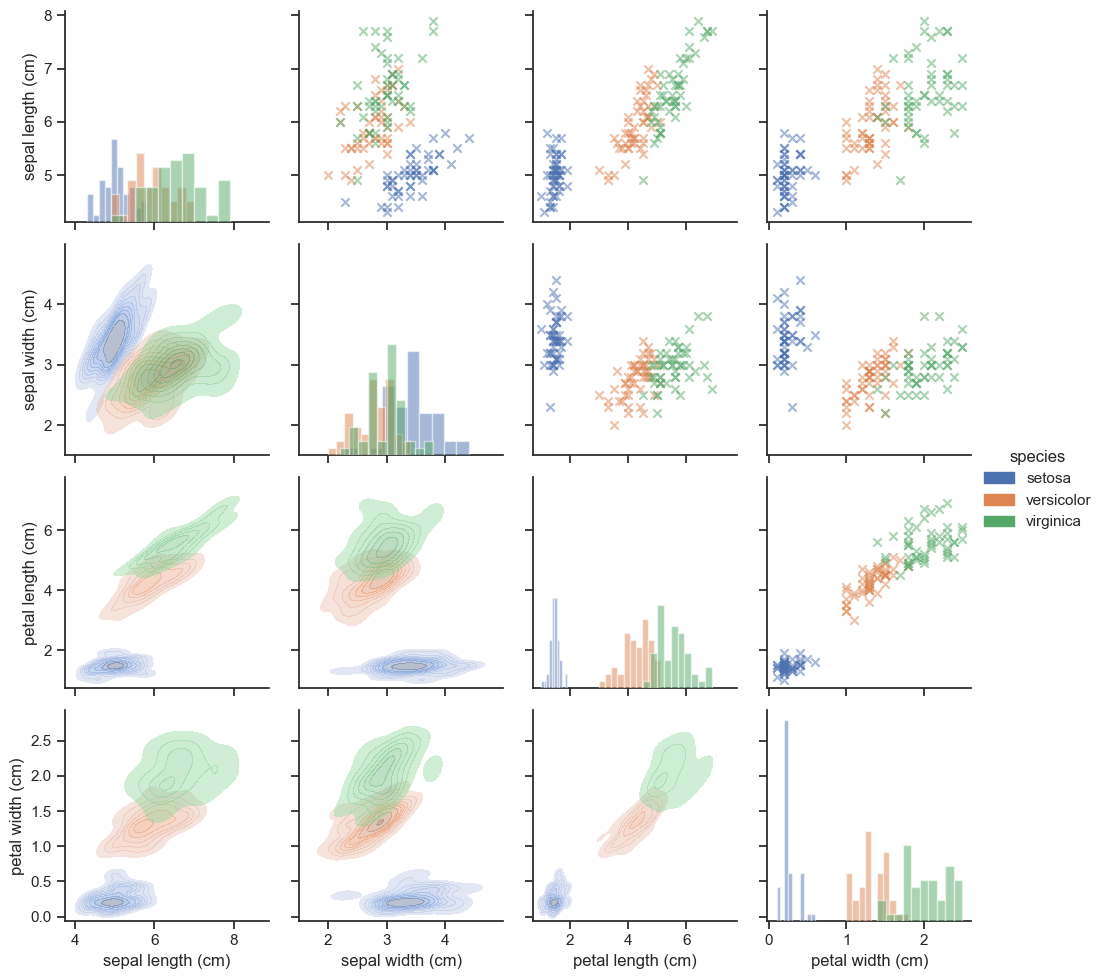

In [1368]:
g = sns.PairGrid(df_iris, hue="species")
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=0.5, marker='x')
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.4)
g.add_legend()

In [1369]:
X_iris = df_iris.iloc[:,:-1]
Y_iris = df_iris.iloc[:,-1]

####  Model selection and training ( Kmeans , Heir. , DBSCAN)

#### KMeans

In [1370]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

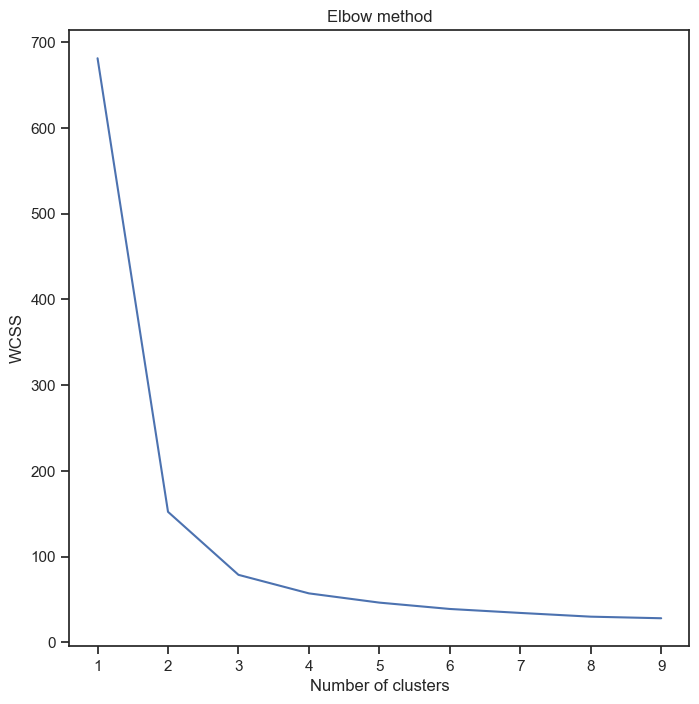

In [1371]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### From the Elbow the K=3

In [1372]:
kmeans = KMeans(n_clusters = 3 , 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
y_kmeans = kmeans.fit_predict(X_iris)

In [1373]:
def plot_data_cluster_output(method, y_clusters, features,
                             output, k_clusters, x_axis, y_axis):
    """
    function plotting the data labeled by clusters and by output
    """
    # plotting the points labeled by the cluster
    # legend
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    colors = iter(cm.rainbow(np.linspace(0, 1, k_clusters)))
    
    for i in range(0,k_clusters):
        ax1.scatter(features.iloc[y_clusters == i, x_axis], features.iloc[y_clusters == i, y_axis], s = 30, color= next(colors), label = 'cluster ' + str(i))
    ax1.legend()
    
    # plotting the centroid
    if method=='kmeans':
        # plotting the centroids of the clusters
        ax1.scatter(kmeans.cluster_centers_[:, x_axis], kmeans.cluster_centers_[:,y_axis], s = 30, c = 'yellow', label = 'centroids')
    
    # title
    ax1.title.set_text(method + " clustering on " + features.columns[x_axis] + " and " + features.columns[y_axis])
    # x label
    ax1.set_xlabel(features.columns[x_axis])
    # y label
    ax1.set_ylabel(features.columns[y_axis])
    
    # preparing legend to get the same colour if the number of clusters is equal to the number of labels
    if len(output.unique())==k_clusters:
        # initialize labels vector
        labels=[None]*3
        
        # reordering labels
        for i in range(0,k_clusters):
            index_label=np.where(np.amax(pd.crosstab(y_kmeans, output).iloc[:,i].values)==pd.crosstab(y_kmeans, output).iloc[:,i].values)[0]
            labels[index_label[0]]=output.unique()[i]
    else:
        labels=output.unique()
    
    plt.figure(2)
    colors = iter(cm.rainbow(np.linspace(0, 1, len(output.unique()))))
    
    # plotting the points labeled by the label
    for i in labels:
        ax2.scatter(features.iloc[output.values == i, x_axis], features.iloc[output.values == i, y_axis], s = 30, color = next(colors), label = i)   
    ax2.legend()
    # title
    ax2.title.set_text("Data labeled on species depending on " + features.columns[x_axis] + " and " + features.columns[y_axis])
    # x label
    ax2.set_xlabel(features.columns[x_axis])
    # y label
    ax2.set_ylabel(features.columns[y_axis])


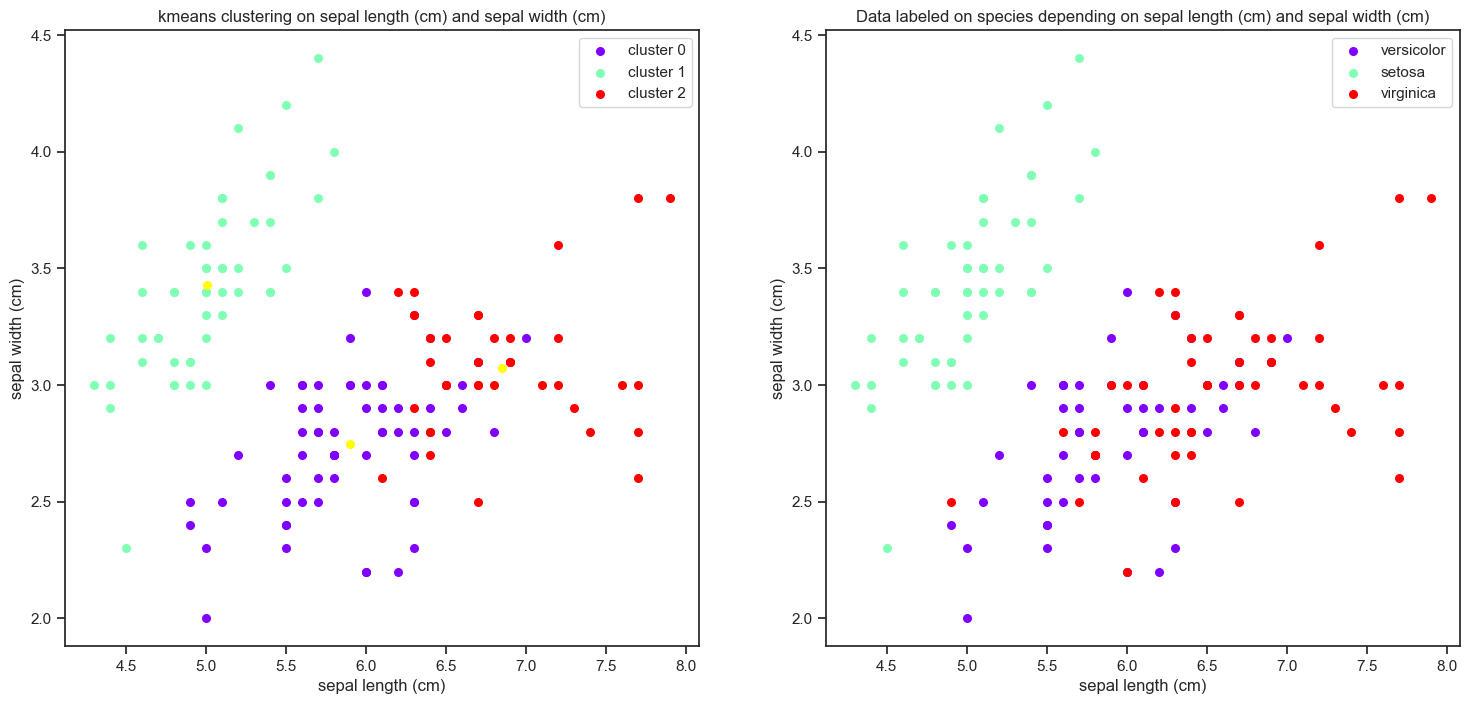

<Figure size 800x800 with 0 Axes>

In [1374]:
plot_data_cluster_output('kmeans', y_kmeans, X_iris, Y_iris, 3, 0, 1)



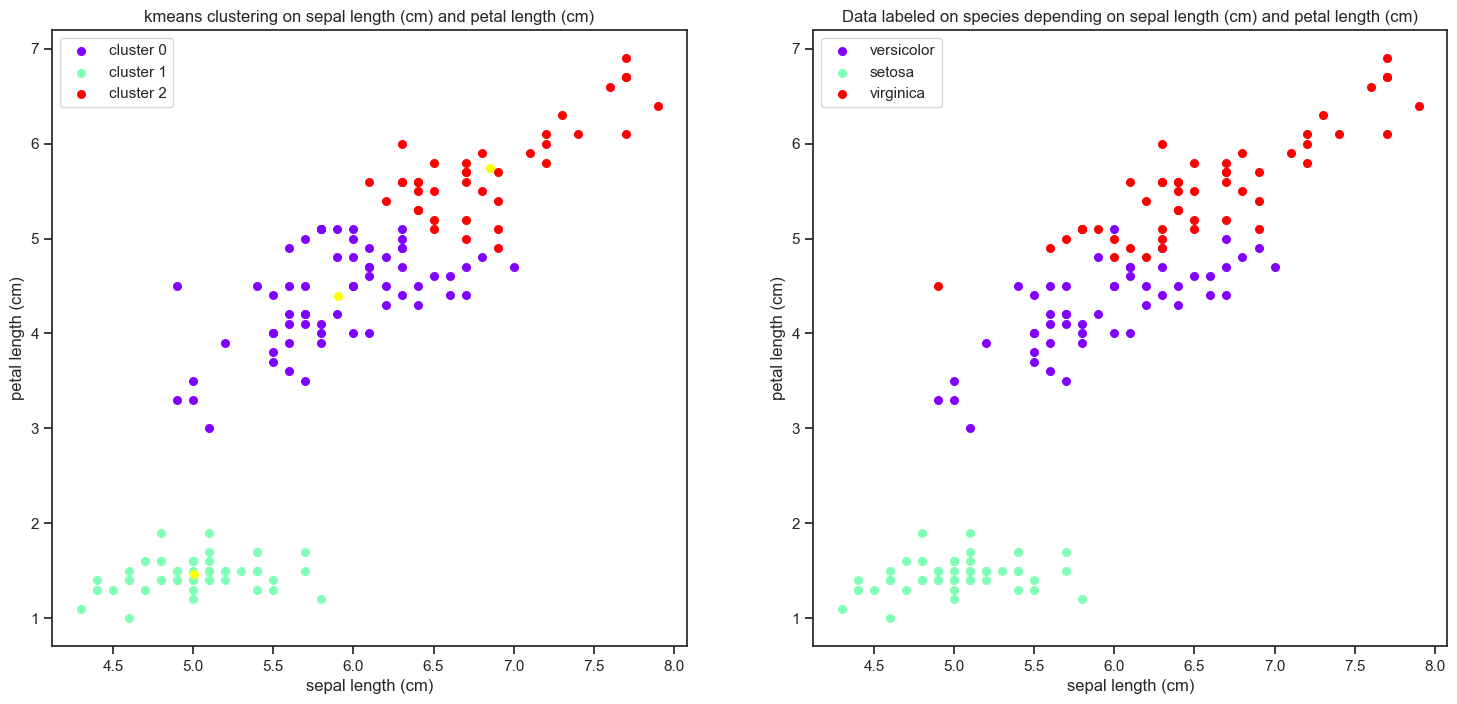

<Figure size 800x800 with 0 Axes>

In [1376]:
plot_data_cluster_output('kmeans', y_kmeans, X_iris, Y_iris, 3, 0, 2)

In [1377]:
pd.crosstab(y_kmeans, Y_iris)

species  setosa  versicolor  virginica
row_0                                 
0             0          48         14
1            50           0          0
2             0           2         36

In [297]:
## evaluate using the silhoutte score also 

In [1378]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette(y_clusters, k_clusters, features):
    """
    Function to compute and display the average silhouette score
    arguments: y_clusters = clustering output (cluster labels)
               k_clusters = number of clusters
               features = features used for clustering
    """
    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(features, y_clusters)
    print("For n_clusters =", k_clusters,
          "the average silhouette_score is:", silhouette_avg)

    # Optionally, you can also compute the silhouette score for each sample:
    sample_silhouette_values = silhouette_samples(features, y_clusters)
    
    # If you want to inspect individual sample scores, you can print them:
    # print("Silhouette scores for each sample:", sample_silhouette_values)

    return silhouette_avg

In [1379]:
silhouette(y_kmeans,3,X_iris)

For n_clusters = 3 the average silhouette_score is: 0.5528190123564095


np.float64(0.5528190123564095)

In [1381]:
# creating the k-means classifier with n_clusters being k, the number of clusters for the model
k_5_means = KMeans(n_clusters = 4 , 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
# fitting the model
y_5_kmeans = k_5_means.fit_predict(X_iris)
silhouette(y_5_kmeans,5,X_iris)

For n_clusters = 5 the average silhouette_score is: 0.49805050499728726


np.float64(0.49805050499728726)

In [1382]:
## the score decrease so that it is a bad cluster number choice the K is optimized at 3

#####  Hierarchical clustering

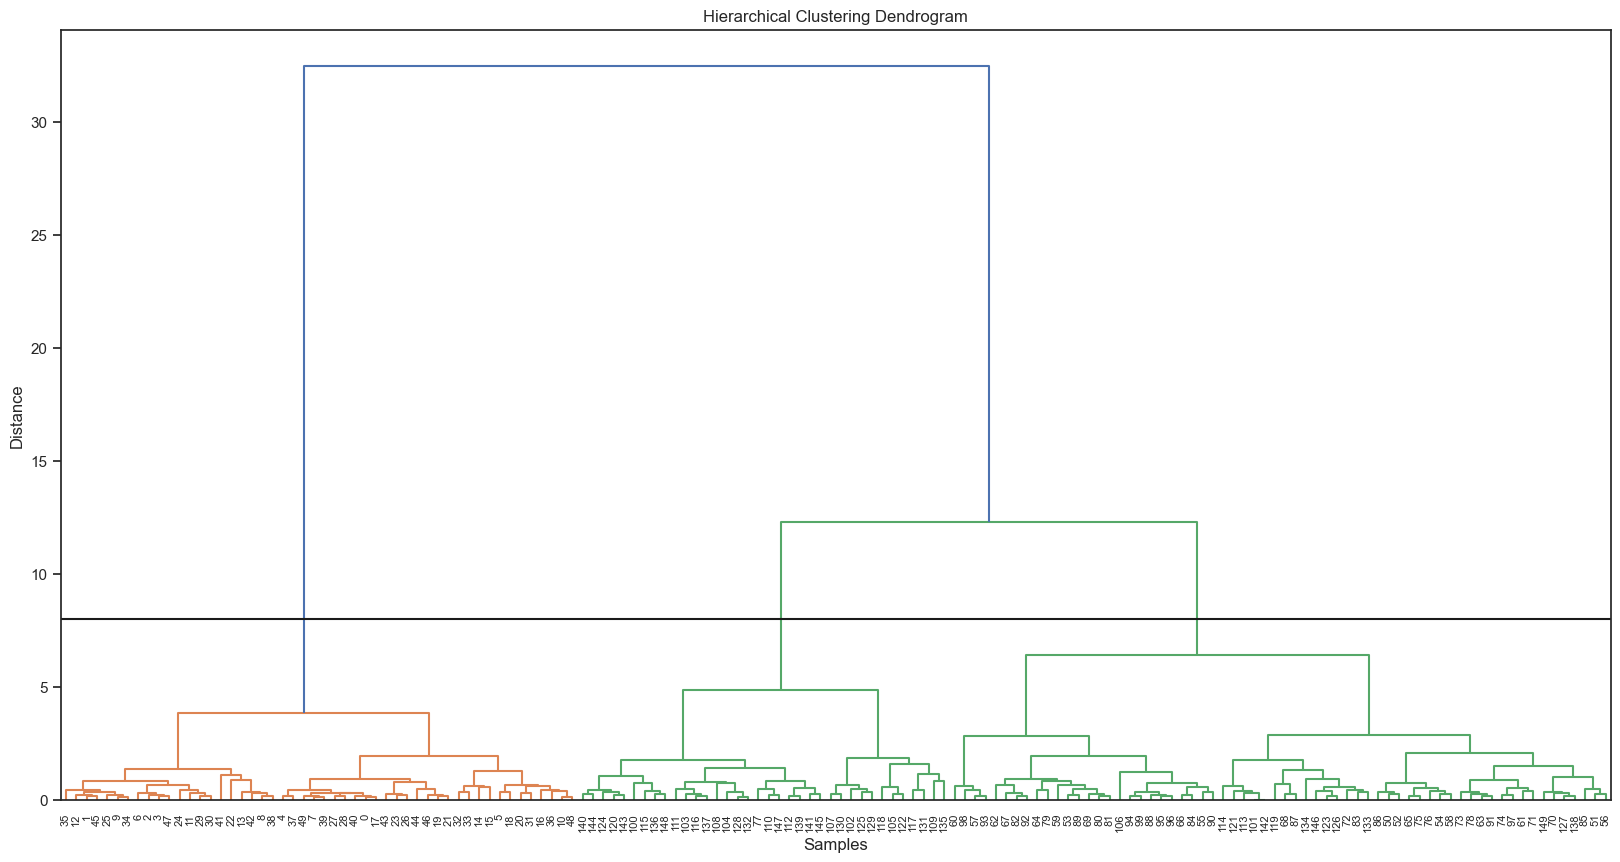

In [1383]:
# generate the linkage matrix
Z = linkage(X_iris, 'ward')


max_d = 8     ## Adjusting it           

plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp', 
    p=150,                 
    leaf_rotation=90.,      
    leaf_font_size=8.,    
)
plt.axhline(y=max_d, c='k')
plt.show()

In [1387]:
# Creating the hierarchical clustering model with n_clusters declaring the number of clusters
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
y_hier=cluster.fit_predict(X_iris)

In [1388]:
silhouette(y_hier,3,X_iris)

For n_clusters = 3 the average silhouette_score is: 0.5543236611296419


np.float64(0.5543236611296419)

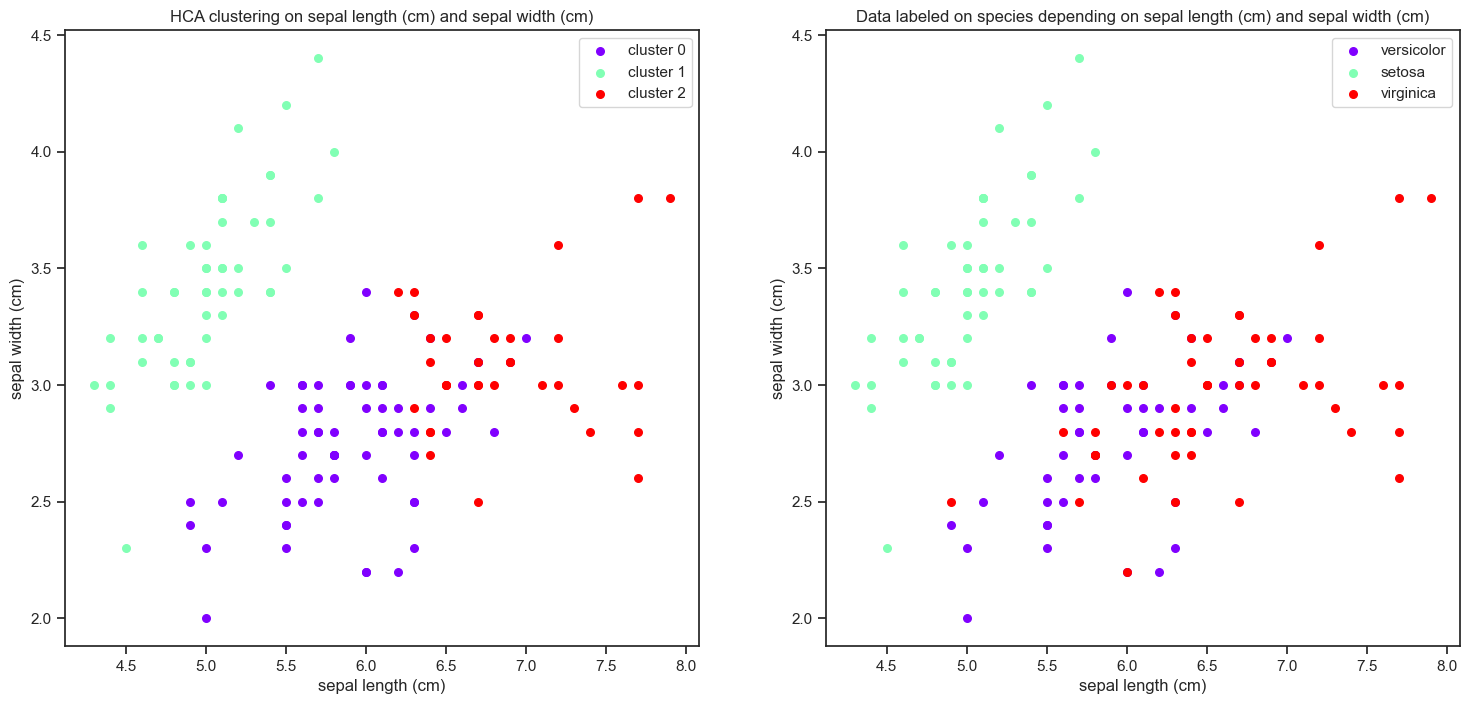

<Figure size 800x800 with 0 Axes>

In [1389]:
plot_data_cluster_output('HCA',y_hier,X_iris, Y_iris, 3, 0, 1)


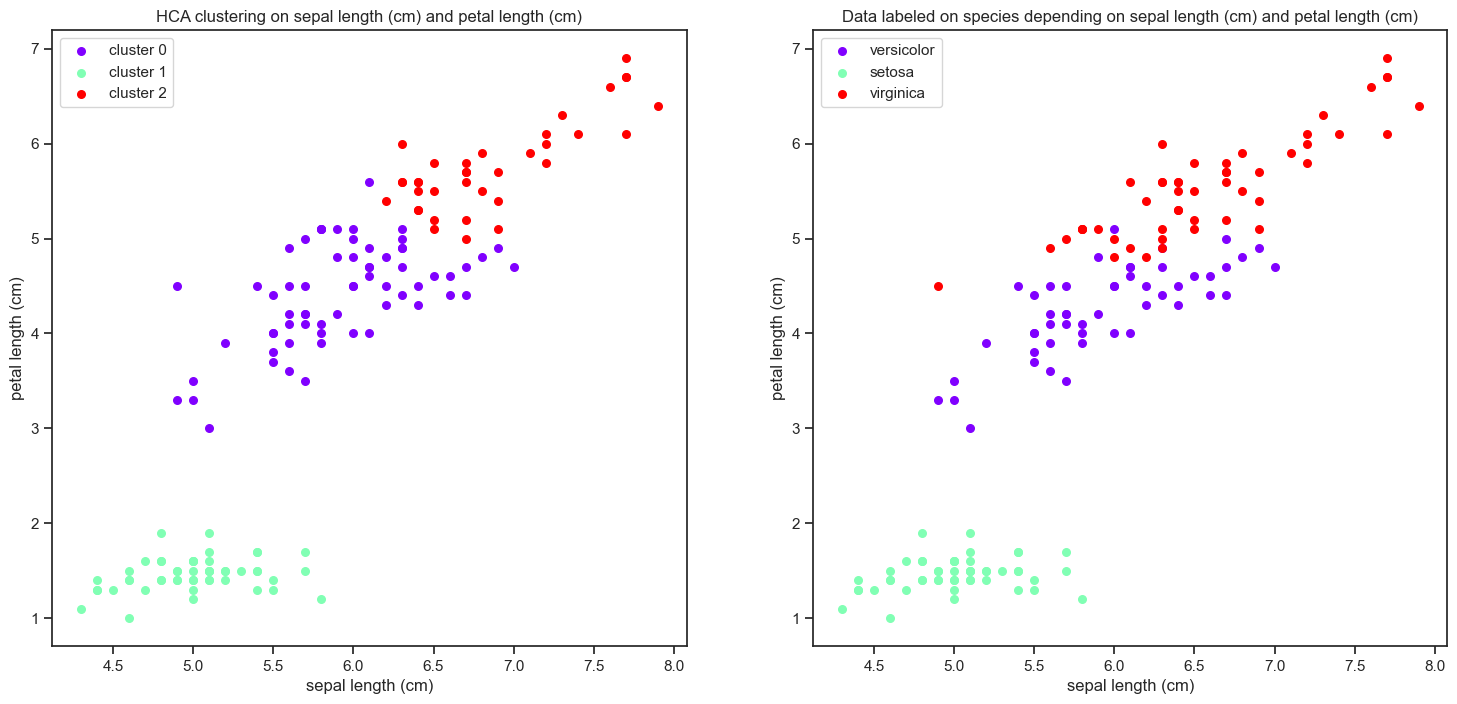

<Figure size 800x800 with 0 Axes>

In [1390]:
plot_data_cluster_output('HCA',y_hier,X_iris, Y_iris, 3, 0, 2)


In [1391]:
## The results for K-means and hierarchical clustering were similar and high-quality (the cluster labels closely corresponded to the true species labels)

#### DBSCAN model

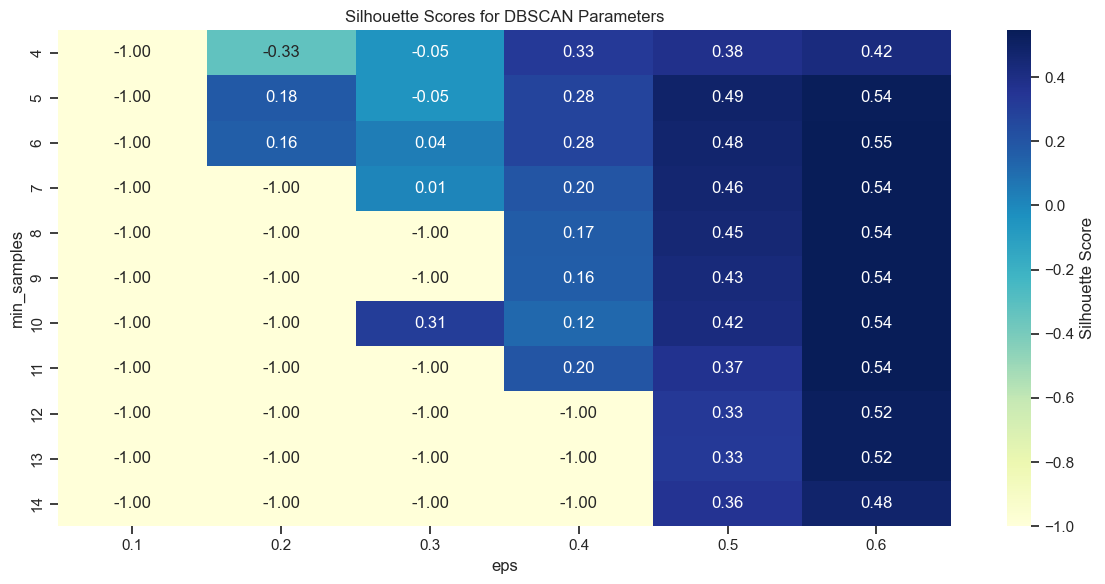

In [1415]:
eps_range = np.arange(0.1, 0.7, 0.1)
min_samples_range = range(4, 15)


results = []
best_score = -1
best_params = (0, 0)

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_iris)

        # Skip cases with 0 or 1 cluster
        if len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in labels):
            continue

        score = metrics.silhouette_score(X_iris, labels)
        results.append((eps, min_samples, score))

        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

heatmap_data = np.full((len(min_samples_range), len(eps_range)), -1.0)

for eps, min_samples, score in results:
    eps_idx = int((eps - eps_range[0]) / 0.1)
    min_samples_idx = min_samples - min(min_samples_range)
    heatmap_data[min_samples_idx, eps_idx] = score

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    xticklabels=[f"{e:.1f}" for e in eps_range],
    yticklabels=list(min_samples_range),
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Silhouette Score"}
)
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Silhouette Scores for DBSCAN Parameters")
plt.tight_layout()
plt.show()



In [1416]:
dbscan = DBSCAN(eps=0.6,min_samples=4)
y_pred = dbscan.fit_predict(X_iris)

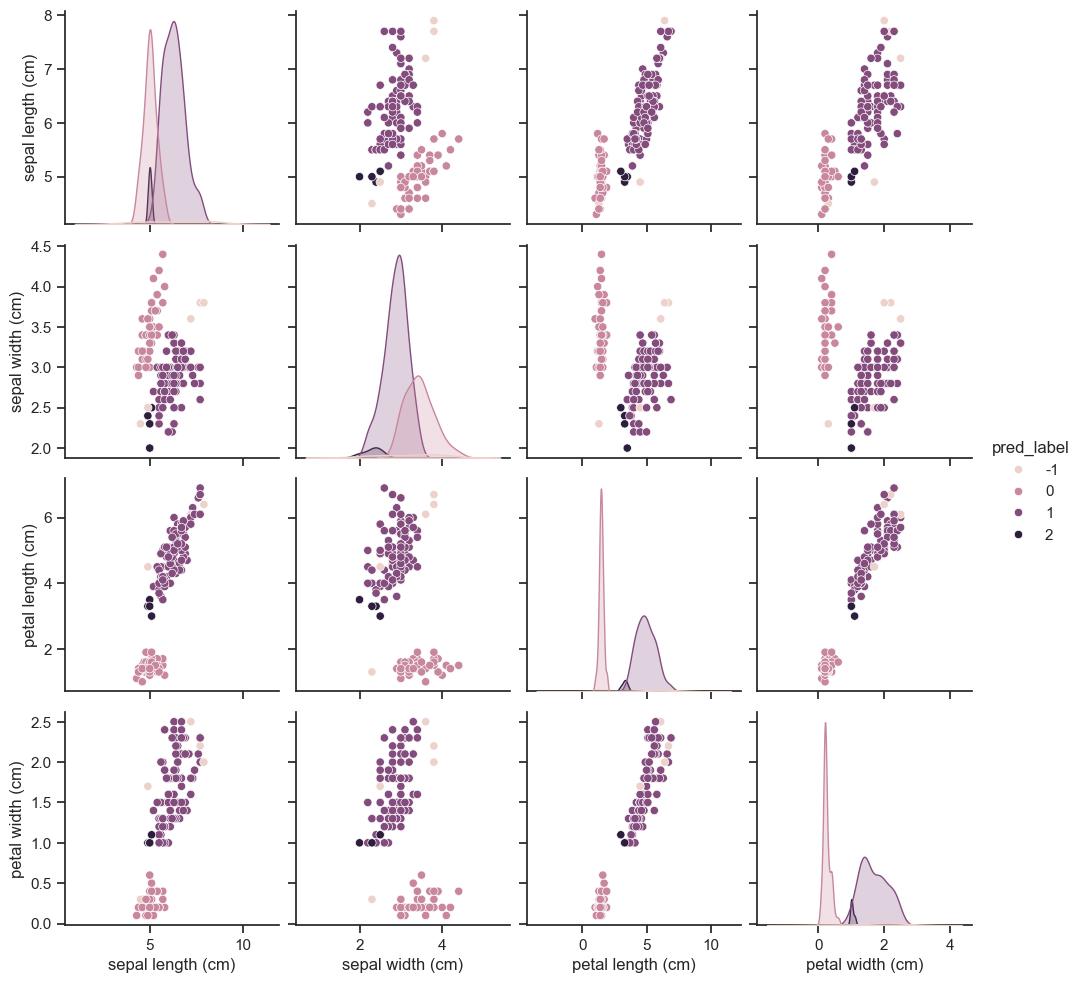

In [1417]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']
val = pd.concat([X_iris,y_pred_df],axis=1)
sns.pairplot(val,hue='pred_label')
plt.show()


[-1  0  1  2]


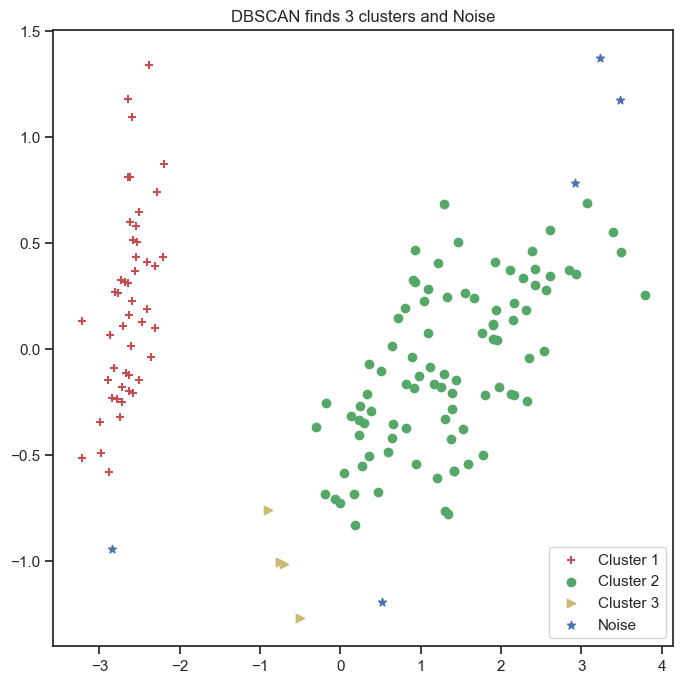

In [1418]:
# Importing Modules
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


# Declaring Model
dbscan = DBSCAN(eps=0.6, min_samples=4)

# Fitting
dbscan.fit(iris_data.data)
print(np.unique(dbscan.labels_))

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris_data.data)
pca_2d = pca.transform(iris_data.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='>')
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2',"Cluster 3", 'Noise'])
plt.title('DBSCAN finds 3 clusters and Noise')
plt.show()

# Clustering Analysis Results

- **DBSCAN**: 
  - **Clusters**: 3 
  - **Silhouette Score**: 0.42

- **KMeans**:
  - **Clusters**: 3 
  - **Silhouette Score**: 0.5528

- **Hierarchical Clustering (HCA)**:
  - **Clusters**: 3 
  - **Silhouette Score**: 0.5543


* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

## Customer dataset
Repeat all the above on the customer data set 

In [1094]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [677]:
# Read the CSV and make the ID as an index colomn  
Customer_data = pd.read_csv('Customer data.csv', index_col=0)
Customer_data.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

In [678]:
Customer_data.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [679]:
Customer_data.describe()

Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.000000  
max       2.000000         2.000000

In [680]:
discrete_features = []
continuous_features = []
for feature in Customer_data.columns:
    print(feature, len(Customer_data[feature].unique()))
    if len(Customer_data[feature].unique()) > 10:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)
        
print()
print('Discrete Features:', discrete_features)
print('Continuous Features:', continuous_features)

Sex 2
Marital status 2
Age 58
Education 4
Income 1982
Occupation 3
Settlement size 3

Discrete Features: ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
Continuous Features: ['Age', 'Income']


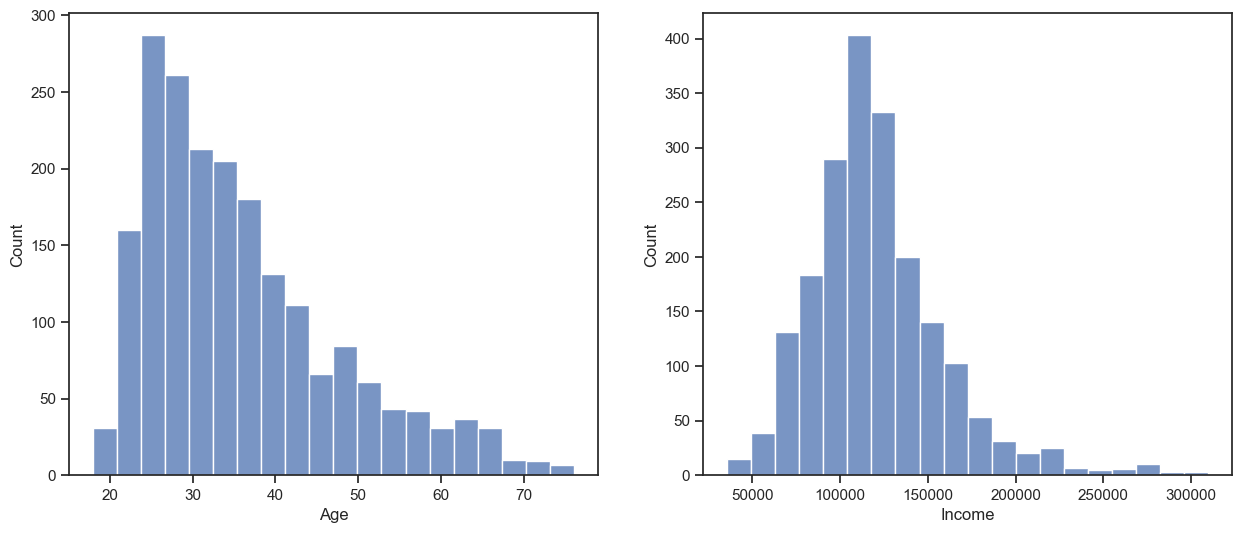

In [681]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

for i, feature in enumerate(continuous_features):
    sns.histplot(ax=ax[i], x=feature, data=Customer_data, bins=20)
    
plt.show()

<Axes: xlabel='Age', ylabel='Income'>

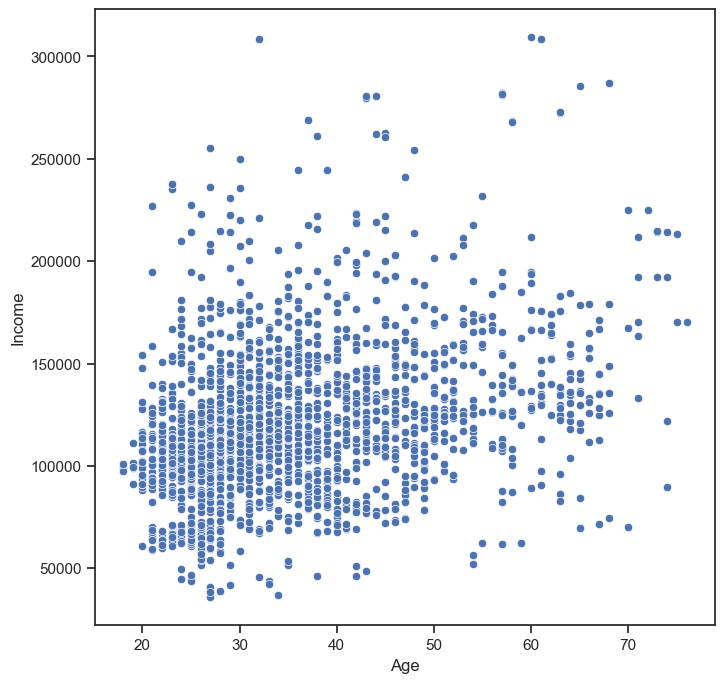

In [682]:
sns.scatterplot(x='Age', y='Income', data=Customer_data)

In [1228]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

scalar = MinMaxScaler()
X_Customer = scalar.fit_transform(Customer_data)

#### KMeans Model

In [1233]:
SSE = [] # Sum of Squared Errors
kmean_sil_scores = []
kmean_index = range(2, 40)
for i in kmean_index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_Customer)
    SSE.append(kmeans.inertia_)
    kmean_sil_scores.append(silhouette_score(X_Customer, labels))
    
    clear_output(wait=True)
    print('Intertia at i =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X_Customer, labels))

Intertia at i = 39 : 67.7865711100054
Silhouette Coefficient: 0.580


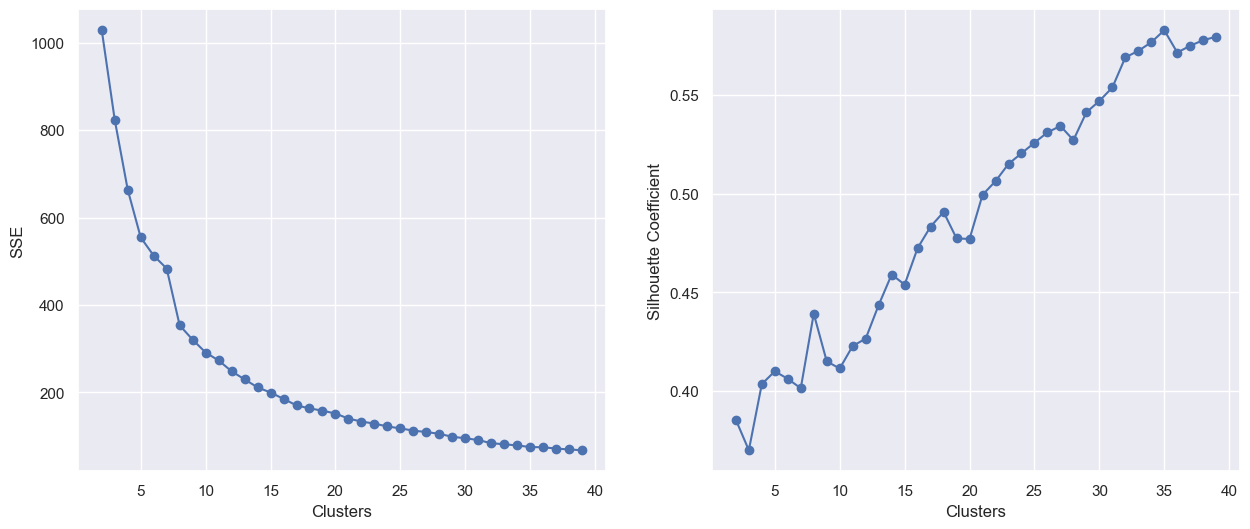

In [1252]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(kmean_index, SSE, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('SSE')

ax[1].plot(kmean_index, kmean_sil_scores, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Silhouette Coefficient')

plt.show()

In [1255]:
##  8 clusters from elbow with score 
k_value = 8
silhouette_score_k8 = kmean_sil_scores[kmean_index.index(k_value)]
print(f"Silhouette Score for K={k_value}: {silhouette_score_k8}")

Silhouette Score for K=8: 0.4392166771090608


In [1254]:
k_value = 10
silhouette_score_k8 = kmean_sil_scores[kmean_index.index(k_value)]
print(f"Silhouette Score for K={k_value}: {silhouette_score_k8}")

Silhouette Score for K=10: 0.4114574322852956


#### 2. Agglomerative Model

In [1262]:
#Define the parameter options
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']
thresholds = [9,20,30] 

Testing: Linkage=ward, Affinity=euclidean, Threshold=9
Silhouette Score: 0.40
Testing: Linkage=ward, Affinity=euclidean, Threshold=20
Silhouette Score: 0.37
Testing: Linkage=ward, Affinity=euclidean, Threshold=30
Silhouette Score: 0.39
Testing: Linkage=complete, Affinity=euclidean, Threshold=9
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=complete, Affinity=euclidean, Threshold=20
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=complete, Affinity=euclidean, Threshold=30
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=average, Affinity=euclidean, Threshold=9
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=average, Affinity=euclidean, Threshold=20
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=average, Affinity=euclidean, Threshold=30
Silhouette Score: Cannot calculate with one cluster
Testing: Linkage=single, Affinity=euclidean, Threshold=9
Silhouette Score: Cannot calculate with 

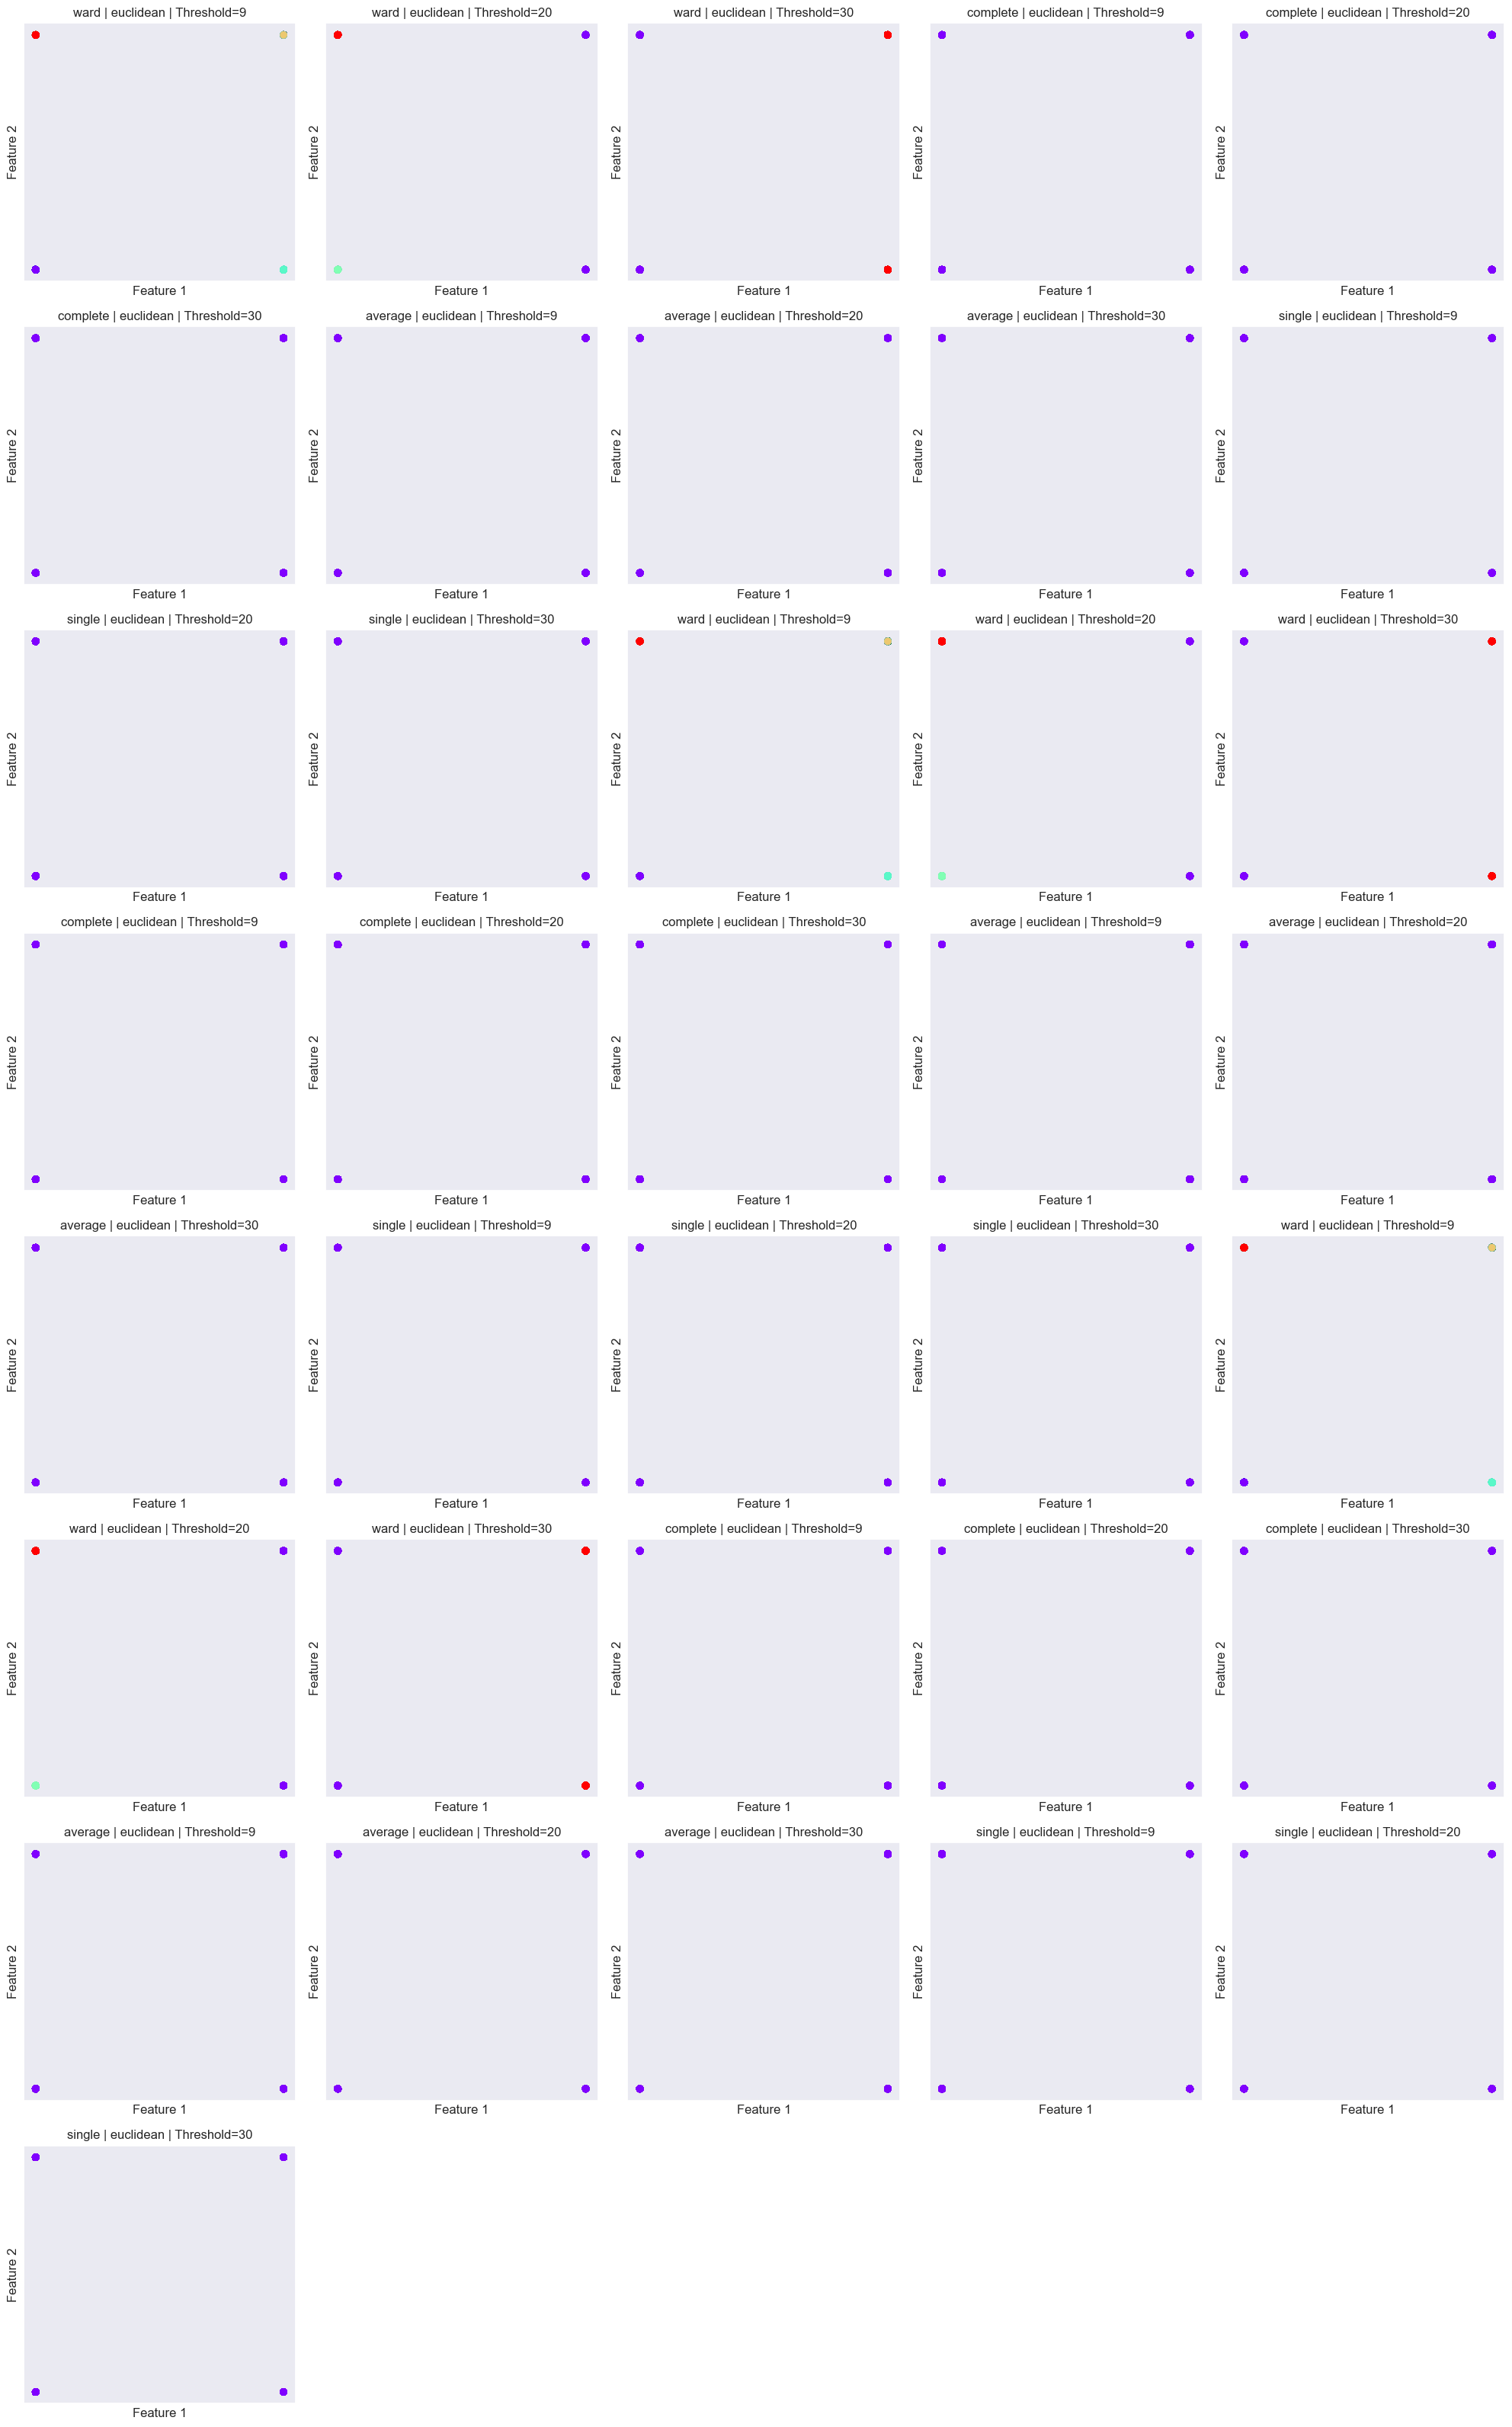


Best Silhouette Score: 0.40
Best Parameters: {'linkage': 'ward', 'affinity': 'euclidean', 'threshold': 9}


In [1263]:
best_params, best_score = agglomerative_clustering_and_plot(X_Customer, affinities, linkages, thresholds)

# Output the best parameters and score
print(f"\nBest Silhouette Score: {best_score:.2f}")
print(f"Best Parameters: {best_params}")


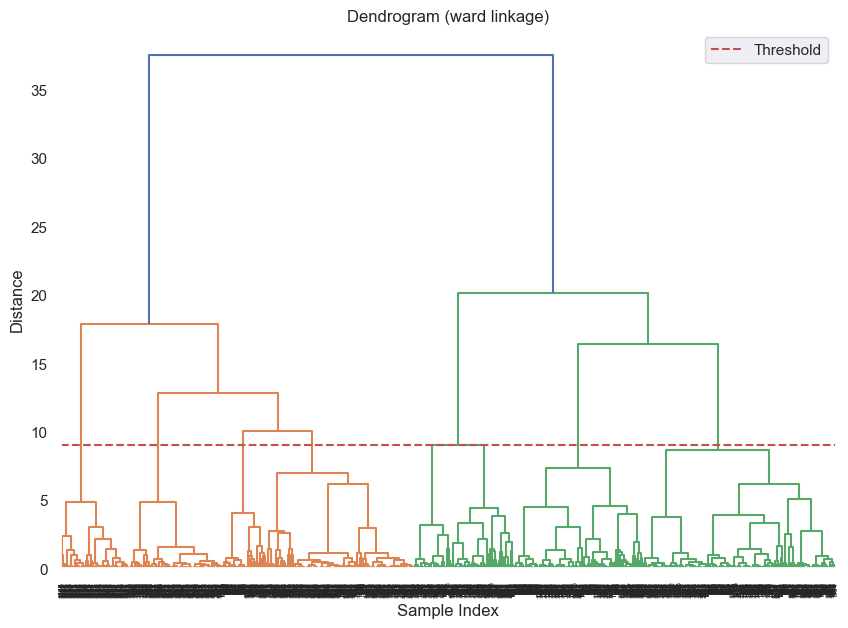

In [1265]:
linkage_method = best_params['linkage']
affinity_metric = best_params['affinity']
threshold = best_params['threshold']
Z = linkage(X_Customer, method=linkage_method, metric=affinity_metric)

plot_dendrogram(Z, threshold, linkage_method)

## Agglomerative suggests Best Silhouette Score: 0.40
*** Best Parameters: {'linkage': 'ward', 'affinity': 'euclidean', 'threshold': 9} gives 7 clusters ***


#### 3. DBSCAN Model

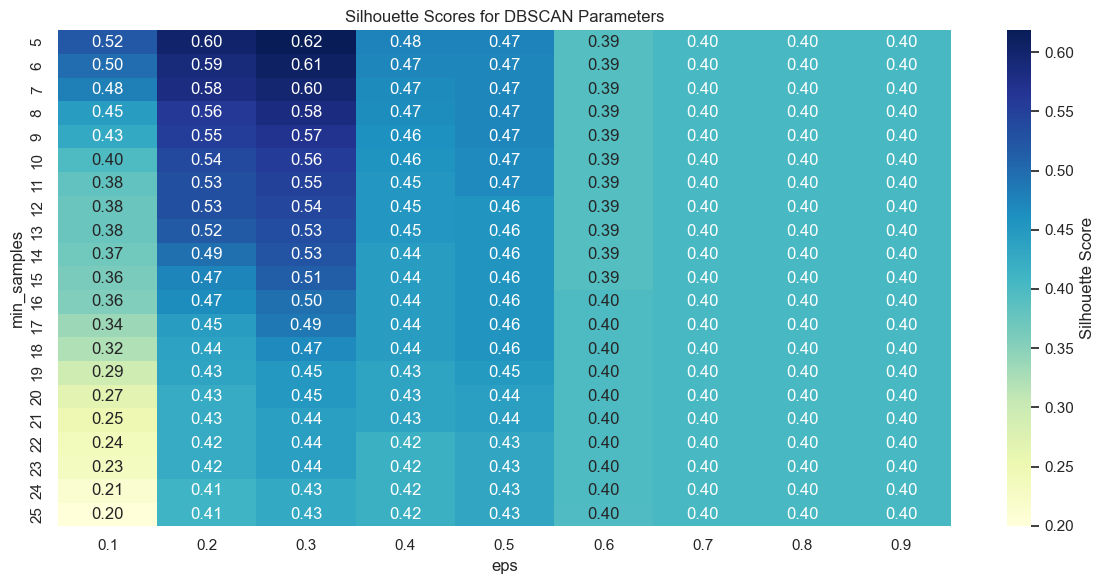

Best eps: 0.30000000000000004
Best min_samples: 5
Best Silhouette Score: 0.6184


In [1281]:
eps_range = np.arange(0.1, 1, 0.1)
min_samples_range = range(5, 26)


results = []
best_score = -1
best_params = (0, 0)

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        customer_labels = dbscan.fit_predict(X_Customer)

        # Skip cases with 0 or 1 cluster
        if len(set(customer_labels)) <= 1 or (len(set(customer_labels)) == 2 and -1 in customer_labels):
            continue

        score = metrics.silhouette_score(X_Customer, customer_labels)
        results.append((eps, min_samples, score))

        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

heatmap_data = np.full((len(min_samples_range), len(eps_range)), -1.0)

for eps, min_samples, score in results:
    eps_idx = int((eps - eps_range[0]) / 0.1)
    min_samples_idx = min_samples - min(min_samples_range)
    heatmap_data[min_samples_idx, eps_idx] = score

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    xticklabels=[f"{e:.1f}" for e in eps_range],
    yticklabels=list(min_samples_range),
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Silhouette Score"}
)
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Silhouette Scores for DBSCAN Parameters")
plt.tight_layout()
plt.show()

print(f"Best eps: {best_params[0]}")
print(f"Best min_samples: {best_params[1]}")
print(f"Best Silhouette Score: {best_score:.4f}")

Number of clusters found (excluding noise): 4
Number of noise points: 0


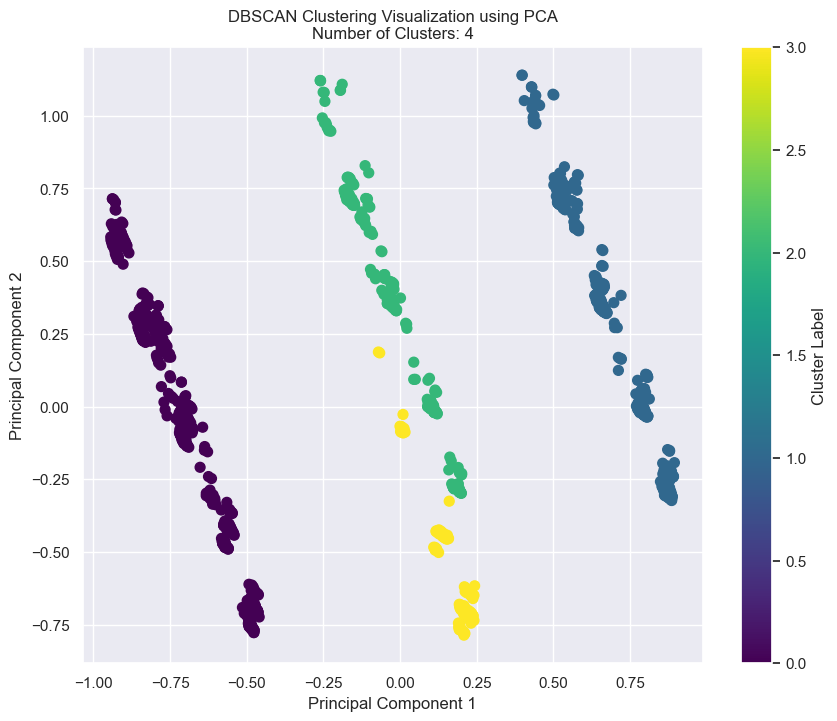

In [1277]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Run PCA to reduce dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X_Customer)

# Count clusters (excluding noise, labeled as -1)
n_clusters = len(set(customer_labels)) - (1 if -1 in customer_labels else 0)
n_noise = list(customer_labels).count(-1)

# Print cluster info
print("Number of clusters found (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)

# Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=customer_labels, cmap='viridis', s=50)
plt.title(f"DBSCAN Clustering Visualization using PCA\nNumber of Clusters: {n_clusters}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.show()


#### In the case of DBSCAN, various values of eps and min_samples were tested, with a focus on evaluating the silhouette score for each configuration. The best performance was observed when eps ranged between 0.2 and 0.3, where DBSCAN achieved its highest silhouette score of 0.6184

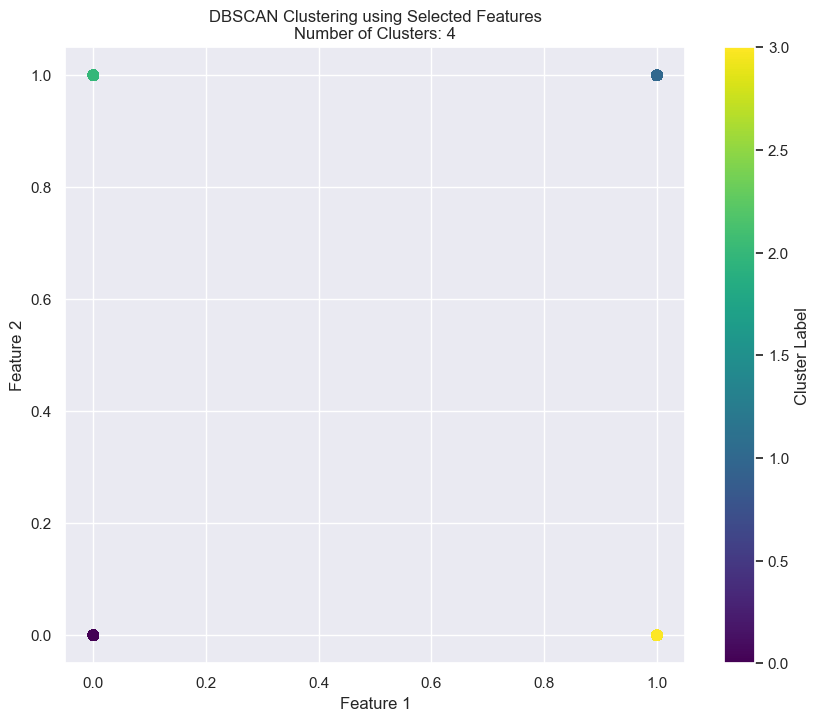

In [1285]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_Customer[:, 0], X_Customer[:, 1], c=customer_labels, cmap='viridis', s=50)
plt.title(f"DBSCAN Clustering using Selected Features\nNumber of Clusters: {n_clusters}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.show()